# Problem Statement : Prediction of Credit Card fraud
Important Libraries


In [3]:
pip install xgboost

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# To ignore warnings
import warnings; warnings.filterwarnings("ignore")

In [5]:
train = pd.read_csv('creditcard.csv')

# in Data Analysis we will Analyze to find out the below points
	Exploratory Data Analysis
	Data Cleaning
	Dealing  Imbalanced data
	Feature Engineering
	Model Selection
	Model Training
	Model Validation
	Model Deployment


In [7]:
# print shape of dataset  with rows and columns
print(train.shape)

(284807, 31)


In [8]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# print the top 5 records
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# to print the full summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Checking for the missing value present in each columns
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that there is no missing value present in the dataframe.

In [12]:
classes=train['Class'].value_counts()
normal_share=round(classes[0]/train['Class'].count()*100,2)
fraud_share=round(classes[1]/train['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

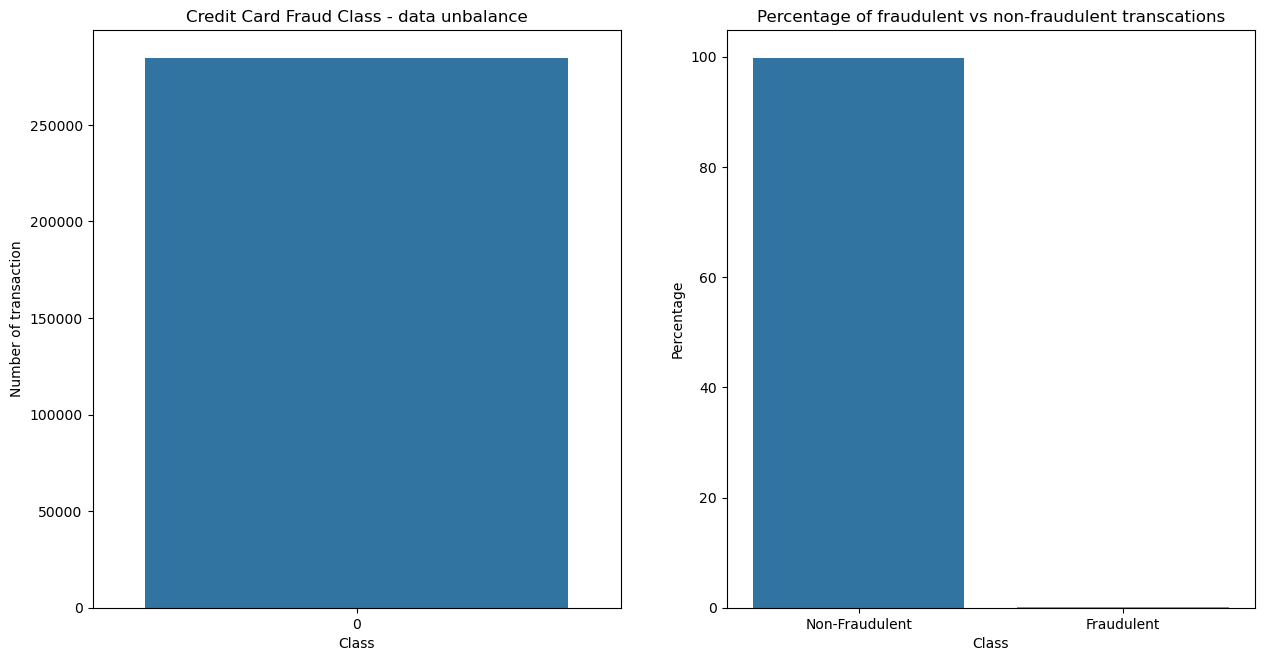

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.countplot(train["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
train_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=train_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

#Observation

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

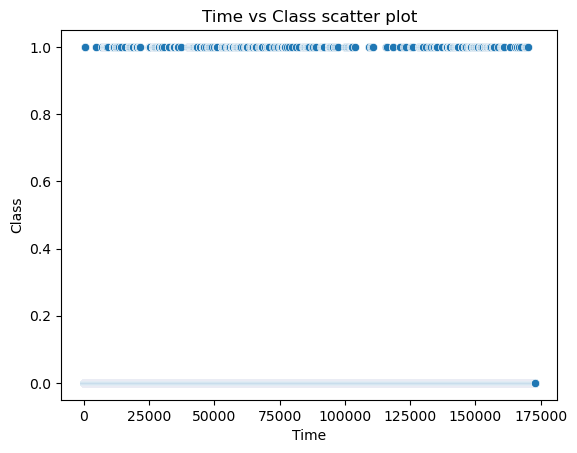

In [14]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=train["Time"], y=train["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

# Feature Scaling using Standard Scaler
We need to scale Amount column.

In [15]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'train' is your dataset (make sure 'Amount' column exists)
# Split into features (X) and target (y)
X = train.drop(columns=['Class'])  # Drop the target variable (Class)
y = train['Class']  # Assuming 'Class' is the target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the 'Amount' column in the training data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transform the 'Amount' column in the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

# Check the scaled values
print(X_train.head())



            Time        V1        V2        V3        V4        V5        V6  \
223361  143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
165061  117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
238186  149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
150562   93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
138452   82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   

              V7        V8        V9  ...       V20       V21       V22  \
223361 -0.627978  0.035994  1.054560  ... -0.125390  0.238197  0.968305   
165061  0.017959 -0.401619  0.040378  ... -0.470372 -0.153485  0.421703   
238186  0.787858  0.117276 -0.131275  ...  0.012227 -0.314638 -0.872959   
150562  0.847902 -0.081323  0.371579  ... -0.253757  0.063525  0.443431   
138452 -0.435632  1.313760  0.536044  ... -0.012320 -0.480691 -0.230369   

             V23       V24       V25       V26       V27       V28  

In [16]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


# Plotting the distribution of a variable to handle skewness

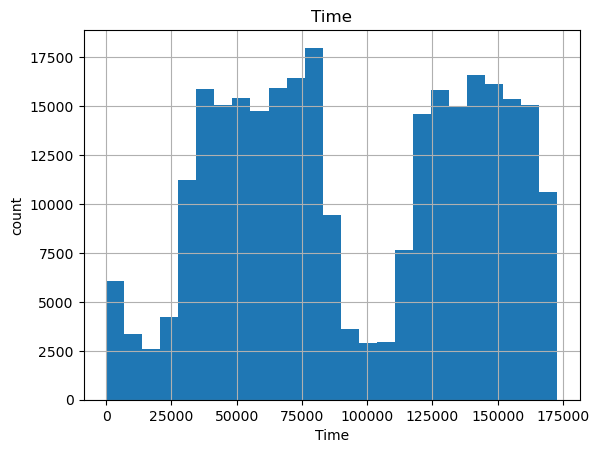

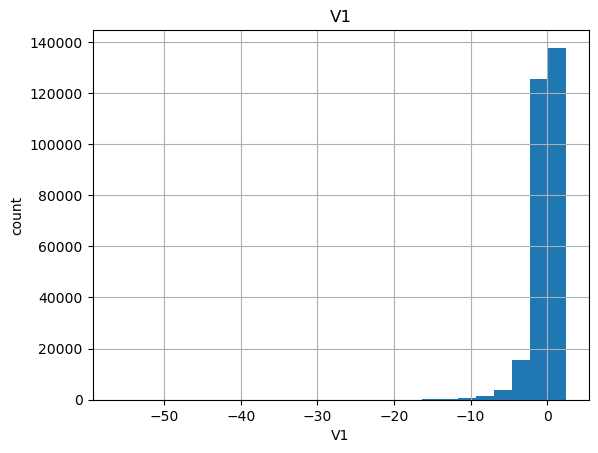

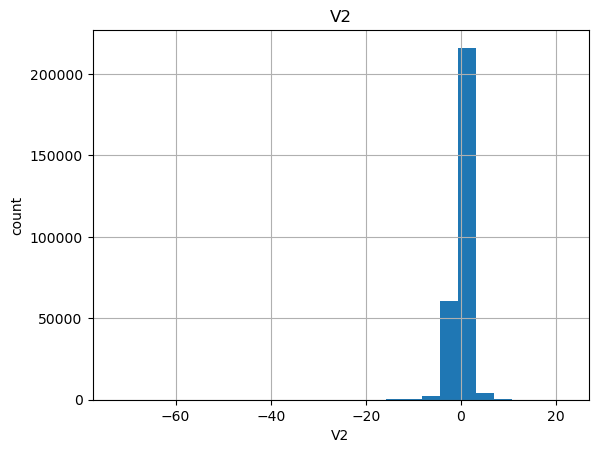

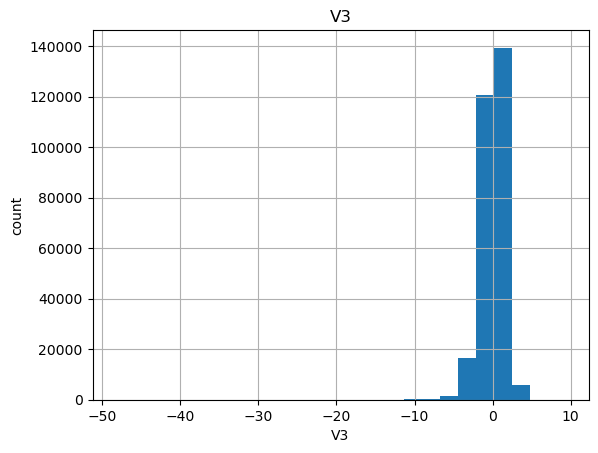

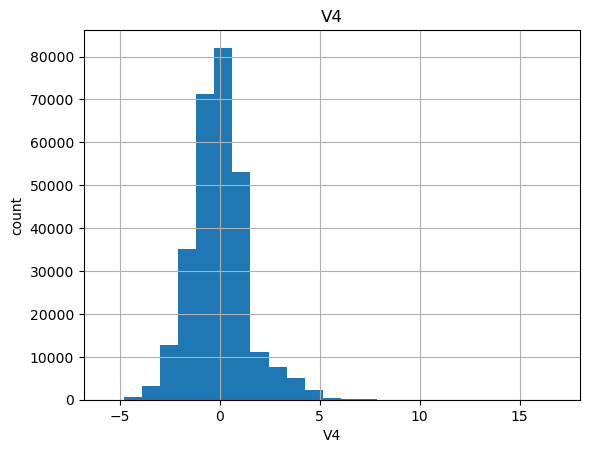

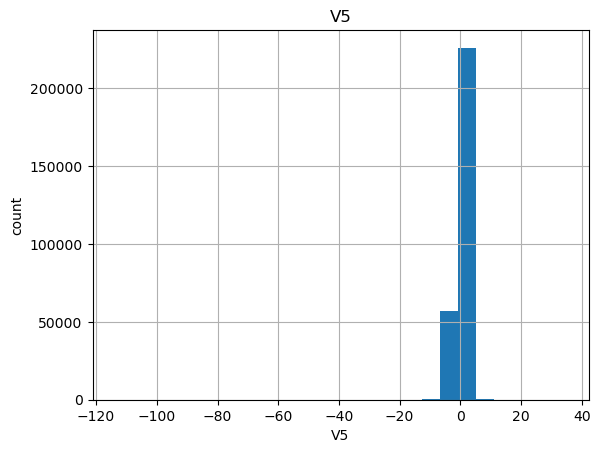

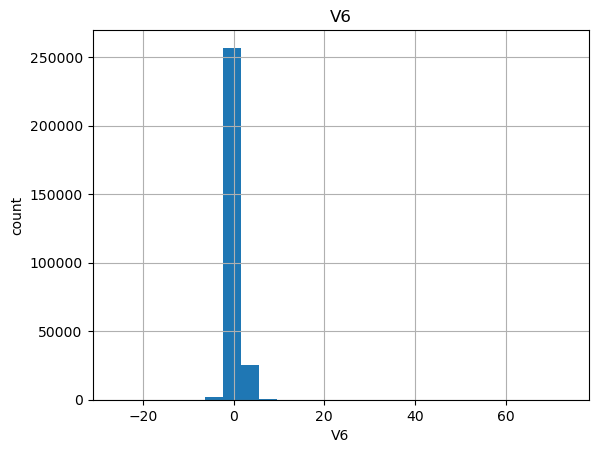

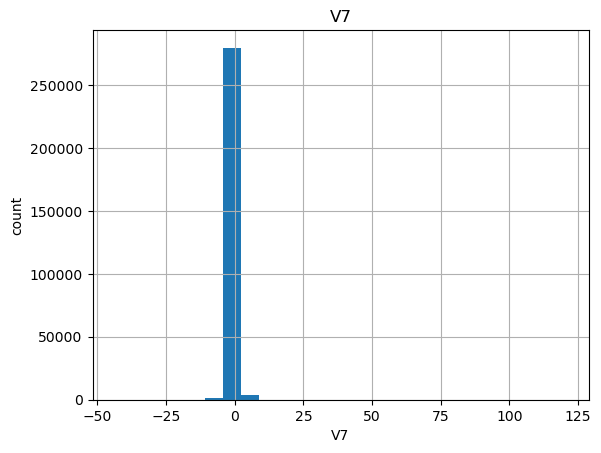

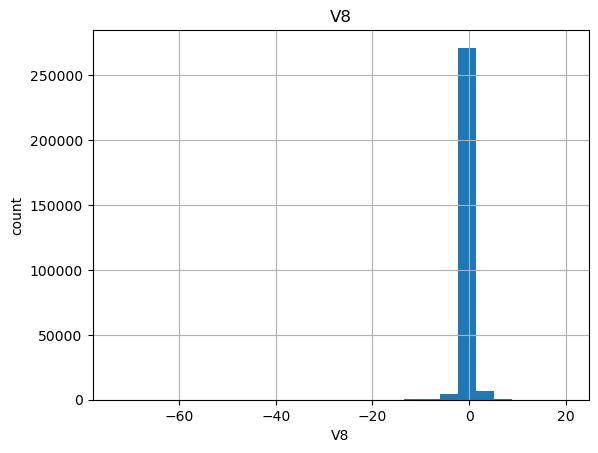

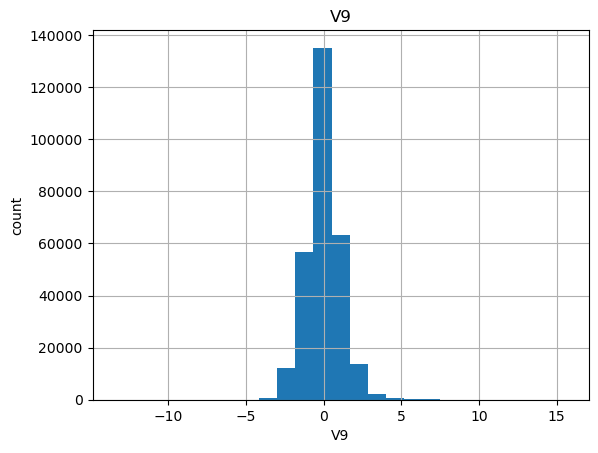

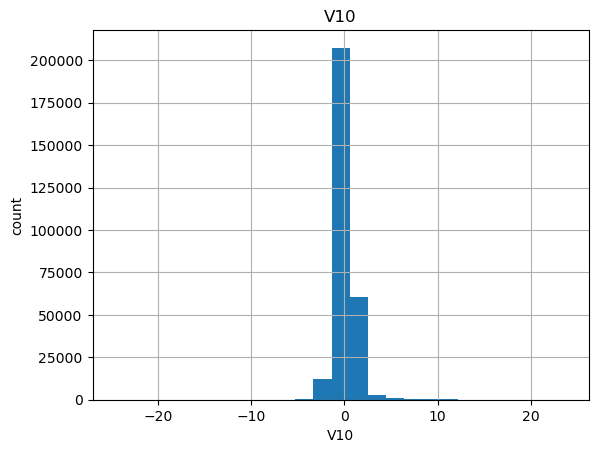

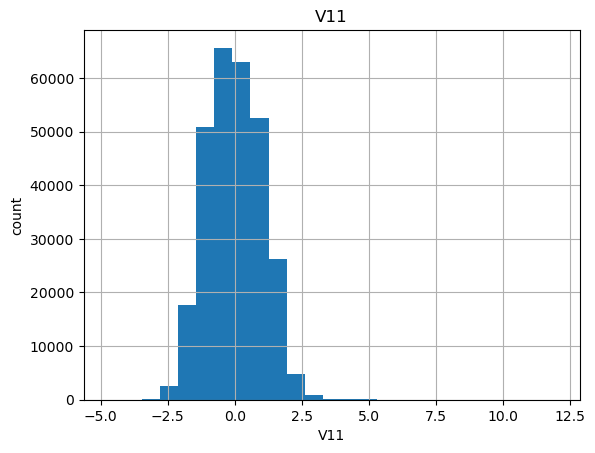

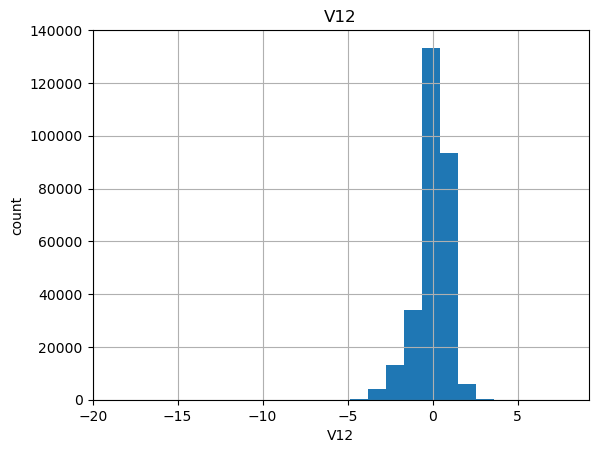

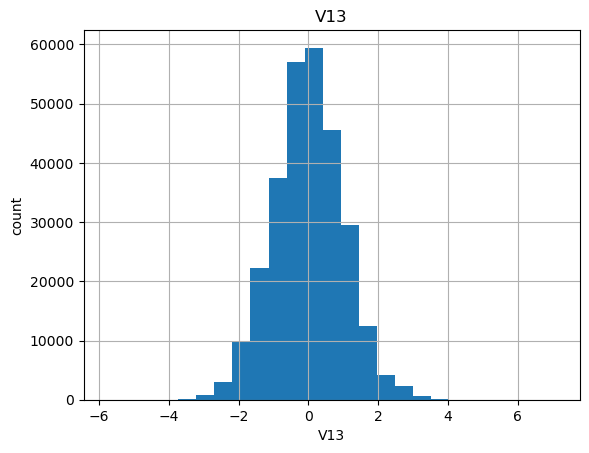

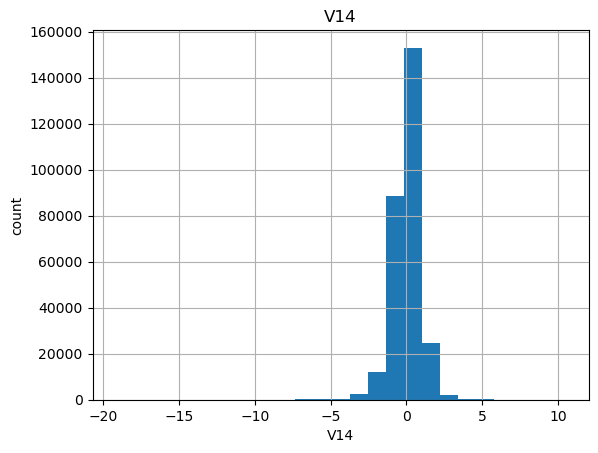

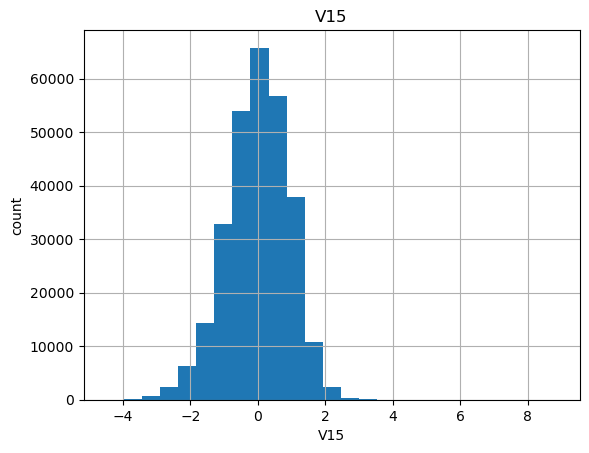

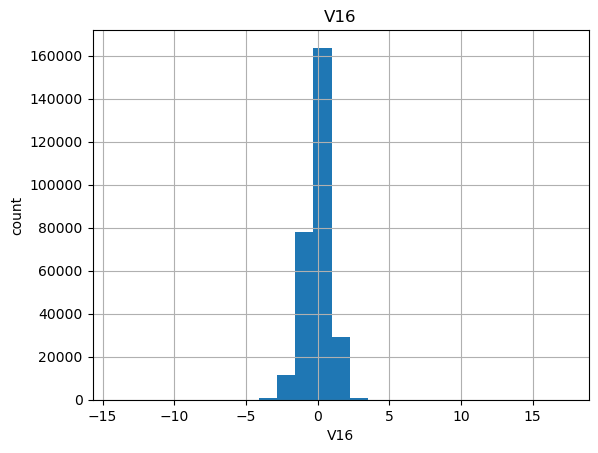

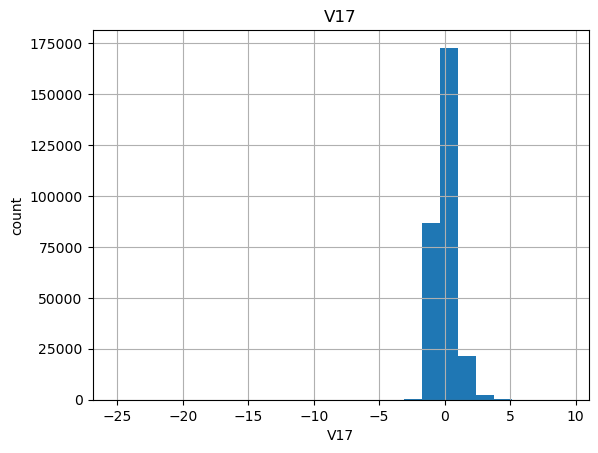

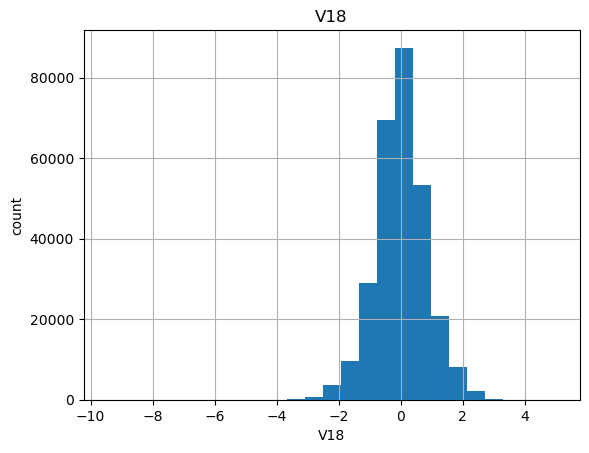

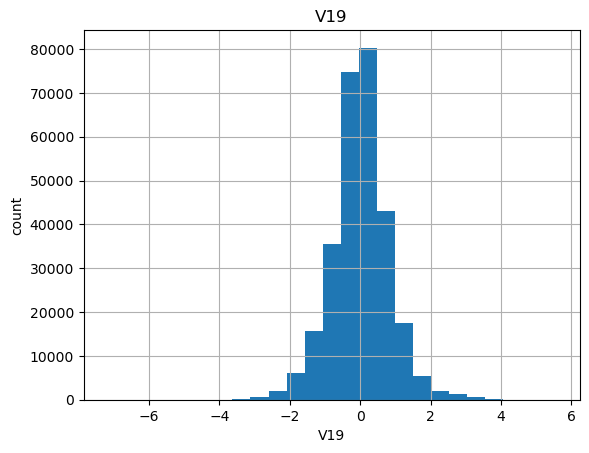

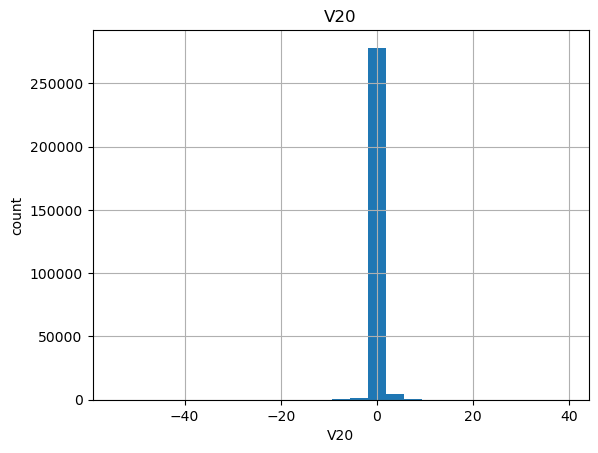

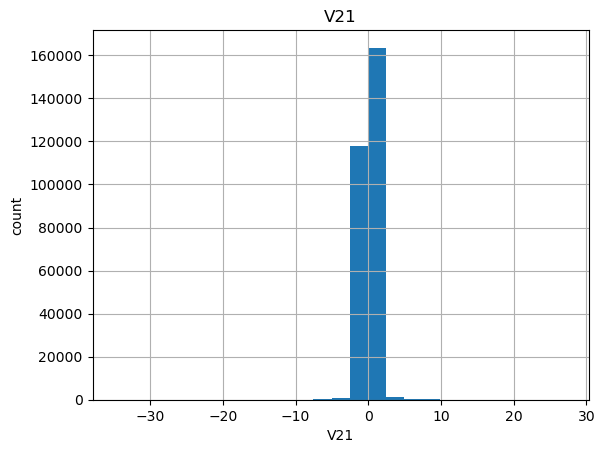

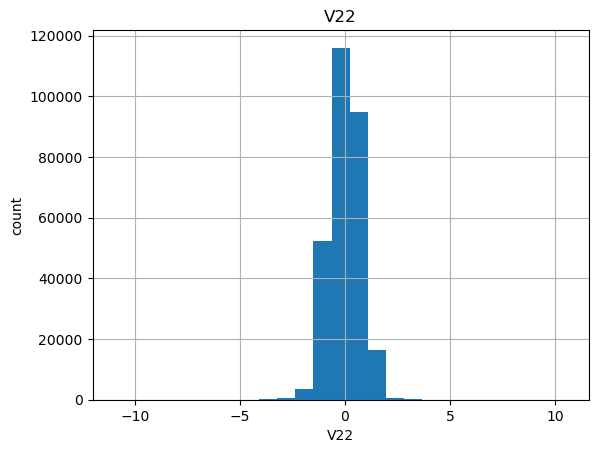

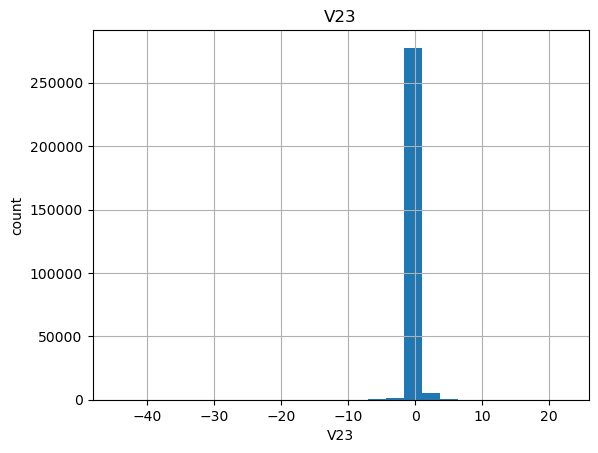

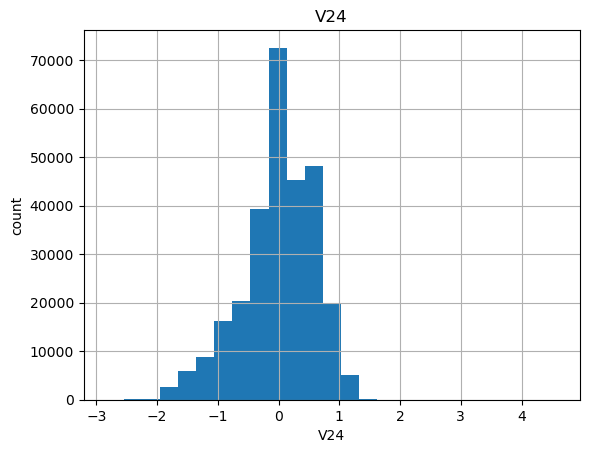

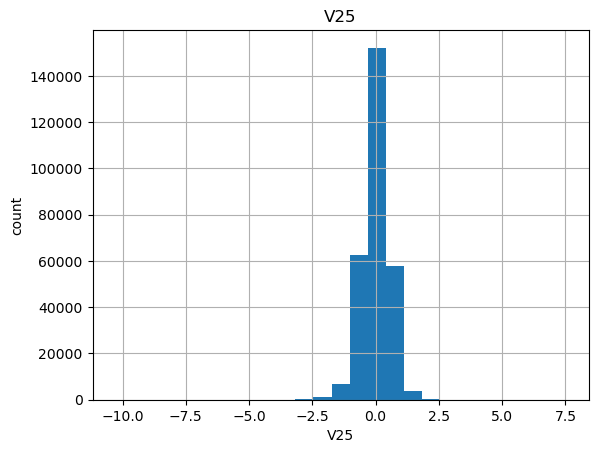

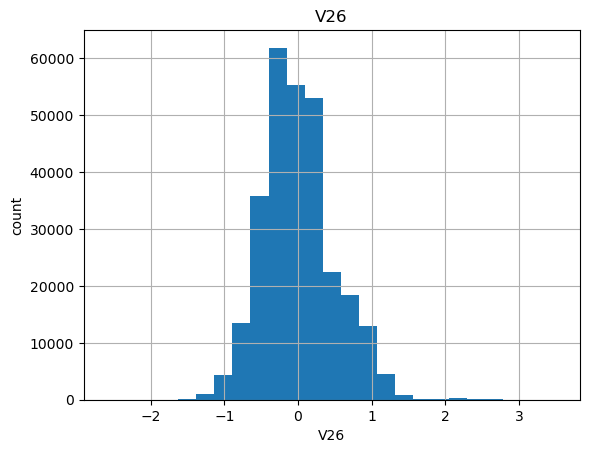

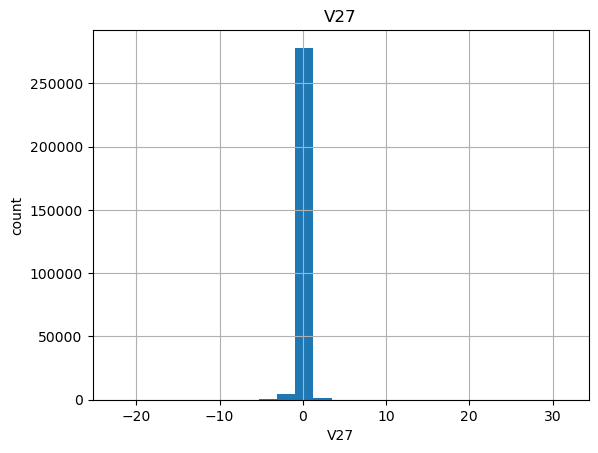

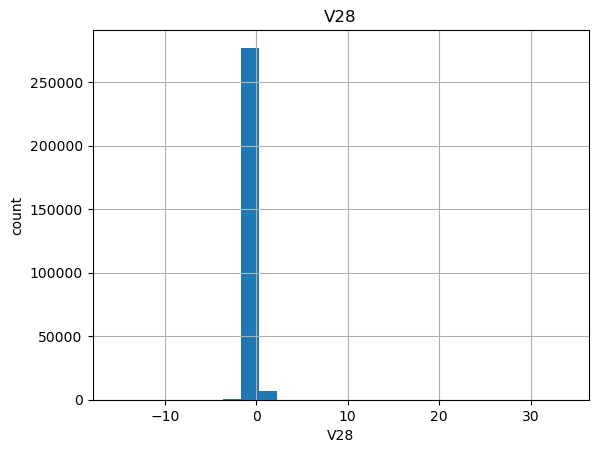

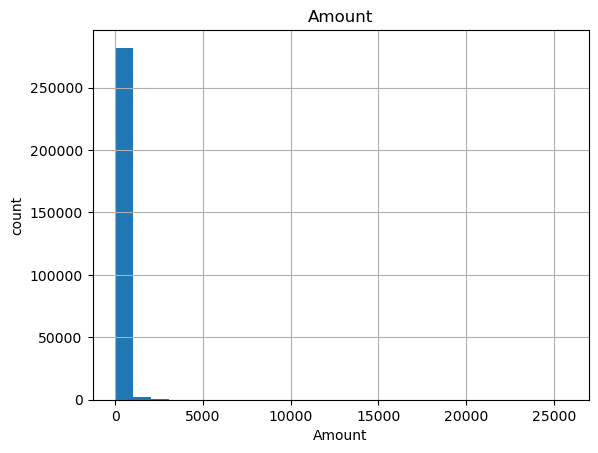

In [17]:
#lets analyze the continuous values by creating histograms to understand the distribution
data=train.copy()
data.drop(columns='Class', inplace = True)

for feature in data.columns:
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [18]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-0.036053,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,...,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [19]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


# Model Building with imbalanced data
1-Logistic Regression2-
Decision Tree3-
XGBoost

In [20]:
# Class imbalance
y_train.value_counts()/y_train.shape

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

# 1. Logistic Regression

In [21]:
# Logistic Regression parameters for K-fold cross vaidation
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
    
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9378348077663319
Best hyperparameters:  {'C': 0.01}


In [22]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.762700,0.192164,0.077796,0.011071,0.01,{'C': 0.01},0.944231,0.937083,0.941379,0.941097,...,0.937835,0.006629,1,0.948151,0.944279,0.947374,0.945917,0.934033,0.943951,0.005132
1,7.600722,0.298263,0.071215,0.011944,0.1,{'C': 0.1},0.946746,0.924395,0.923922,0.922691,...,0.933130,0.011606,4,0.945544,0.927901,0.934743,0.925429,0.938027,0.934329,0.007213
2,7.724002,0.225235,0.069618,0.004738,1,{'C': 1},0.926760,0.947335,0.938960,0.935864,...,0.935386,0.007544,2,0.934306,0.939599,0.948508,0.939081,0.924019,0.937102,0.007991
3,7.980331,0.567926,0.068621,0.004298,10,{'C': 10},0.946794,0.921128,0.922943,0.934216,...,0.934333,0.011041,3,0.945005,0.939295,0.934028,0.936051,0.935636,0.938003,0.003896
4,7.617401,0.402144,0.066624,0.003116,100,{'C': 100},0.925155,0.922865,0.928794,0.928478,...,0.927190,0.002797,6,0.932899,0.939428,0.940363,0.927793,0.927938,0.933684,0.005403
5,6.405260,0.170488,0.040693,0.010197,1000,{'C': 1000},0.936953,0.924029,0.924437,0.928224,...,0.932366,0.009175,5,0.940342,0.940591,0.935530,0.927763,0.937395,0.936324,0.004678


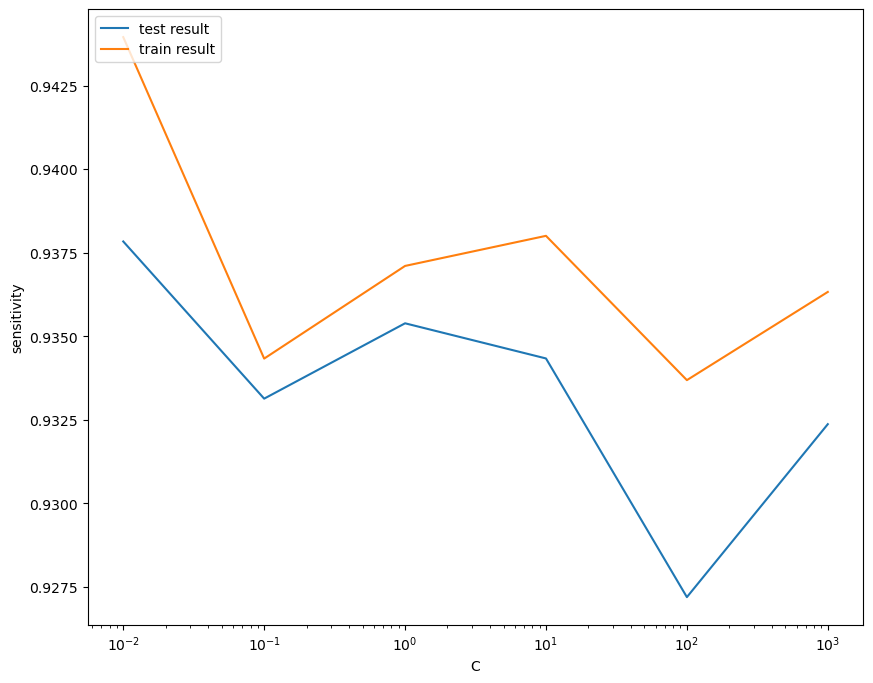

In [23]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [53]:
# Creating function to display ROC-AUC score, f1 score and classification report
# Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are defined (features and target variables)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
log_reg_imb_model = LogisticRegression()  # This can be an imbalanced model if needed
log_reg_imb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = log_reg_imb_model.predict(X_train)

# Check the predictions
print(y_train_pred)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def display_scores(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")

# Assuming y_train and y_train_pred are your true labels and predicted labels
display_scores(y_train, y_train_pred)
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)


[1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 1 

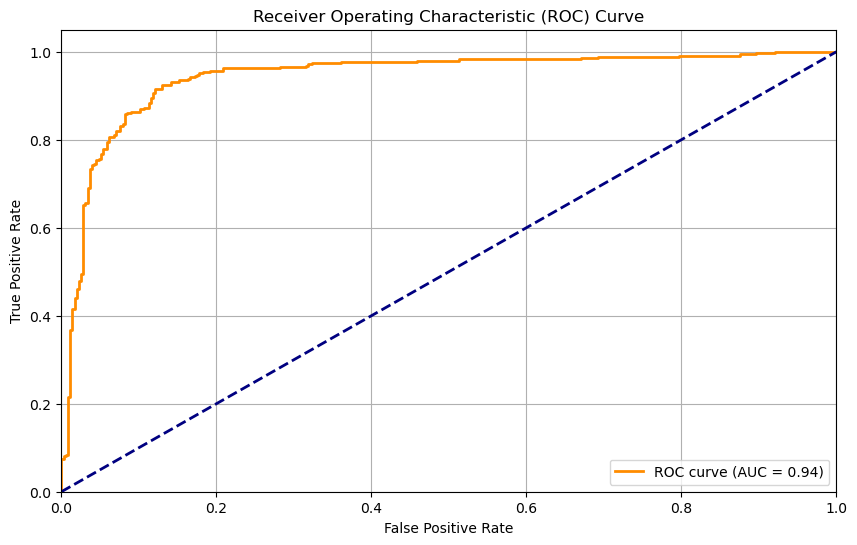

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a simple dataset (if you don't have one)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot the ROC curve using true labels and predicted probabilities
plot_roc_curve(y_train, y_train_pred_proba)
# probabilities for the positive class
y_train_pred_proba = model.predict_proba(X_train)[:, 1]


# 2. Descission Tree

In [26]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for grid search
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the Decision Tree model
dtree = DecisionTreeClassifier()

# Instantiate the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)




Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [27]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004987,8.142962e-04,0.002660,4.708646e-04,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.938144,0.918828,0.939020,0.931997,0.009319,3
1,0.004986,3.371748e-07,0.003328,9.421833e-04,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.938144,0.926898,0.939020,0.934687,0.005520,1
2,0.003340,4.920504e-04,0.002990,8.120598e-04,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.923785,0.920413,0.927045,0.923748,0.002708,5
3,0.002993,6.257699e-07,0.001995,4.495664e-07,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.923785,0.920413,0.927045,0.923748,0.002708,5
4,0.005318,1.243879e-03,0.002660,4.706399e-04,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.936792,0.926898,0.939020,0.934237,0.005269,2
5,0.004654,4.707539e-04,0.001996,1.348699e-06,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.936792,0.914554,0.939020,0.930122,0.011046,4
6,0.002991,8.485379e-07,0.001995,1.173403e-06,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.923785,0.920413,0.927045,0.923748,0.002708,5
7,0.002992,9.989584e-07,0.003660,9.395398e-04,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.923785,0.920413,0.927045,0.923748,0.002708,5


In [28]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9346871394099275
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


# XGBoost

In [29]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

Model evaluation on train set

In [30]:
from xgboost import XGBClassifier

# Define the model (if you're using a different version, you can use your model here)
xgb_imb_model = XGBClassifier(max_depth=2, n_estimators=200)

# Train the model on the training data
xgb_imb_model.fit(X_train, y_train)

# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

# If you have a display_scores function or another way to evaluate the performance:
display_scores(y_train, y_train_pred)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


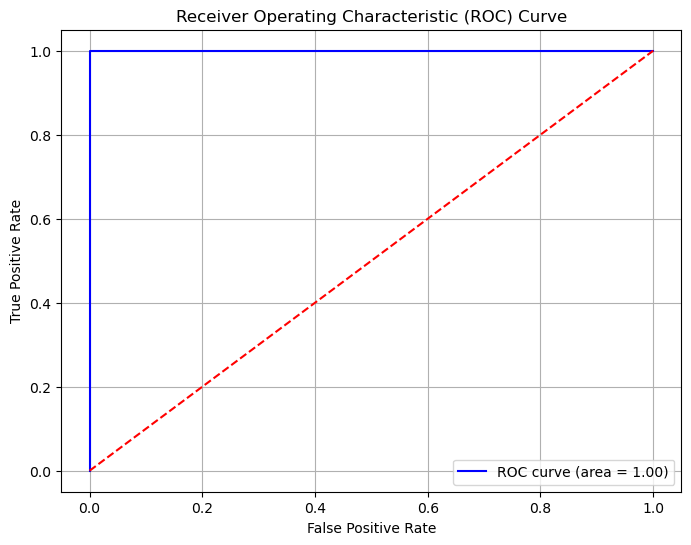

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (class 1)
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba_imb_xgb)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [32]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='0' or train[feature].dtypes== 'int64']
print(categorical_features)

['Class']


In [33]:
discrete_feature=[feature for feature in train.columns if len(train[feature].unique())<25 and feature not in ['class']]
print("Discrete variables count: {}".format(len(discrete_feature)))

Discrete variables count: 1


In [34]:
# step make the list of features which has missing values
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]

# print the missing feature list
print(len(features_with_na))

0


#As we can see we don't have missing values.

#Data Unbalance

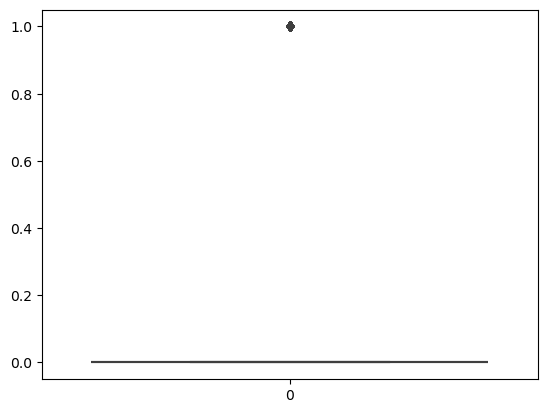

percent of fraud transaction:  0.1727485630620034 %
percent of normal transaction:  99.82725143693798 %


In [35]:
sns.boxplot(train['Class'])
plt.show()
print('percent of fraud transaction: ',len(train[train['Class']==1])/len(train['Class'])*100,"%")
print('percent of normal transaction: ',len(train[train['Class']==0])/len(train['Class'])*100,"%")

only 0.172% of transaction are fraudulent. that means the data is highly unbalanced with respect with target variable Class.

since V1 to V28 are the principal components obtained with PCA we can clearly see that from above plot that from V1 to V28 variable are normalized Variable 'Time' and 'Amount' is not normalized.

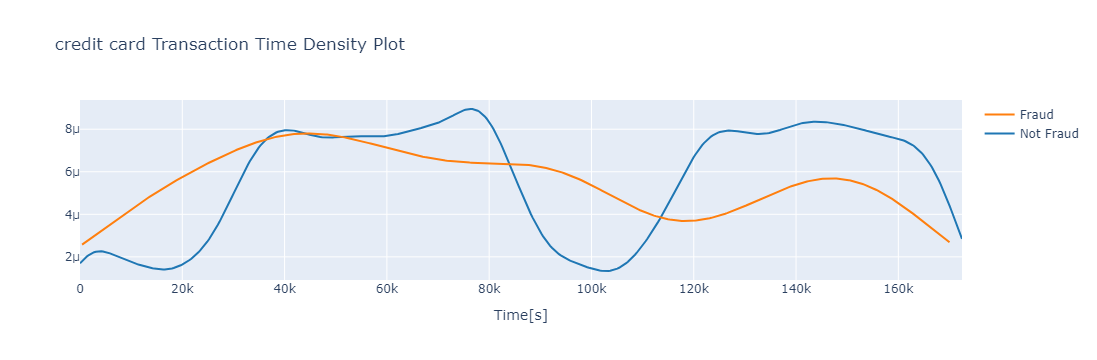

In [36]:
#figure_factory module contains dedicated functions for creating very specific types of plots
import plotly.figure_factory as ff
from plotly import tools 
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
Class_0 = train.loc[train['Class'] == 0]["Time"]
Class_1 = train.loc[train['Class'] == 1]["Time"]
hist_data = [Class_0, Class_1]
group_lables = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_lables, show_hist=False, show_rug=False)
fig['layout'].update(title='credit card Transaction Time Density Plot', xaxis=dict(title='Time[s]'))
pyo.iplot(fig, filename='dist_only')


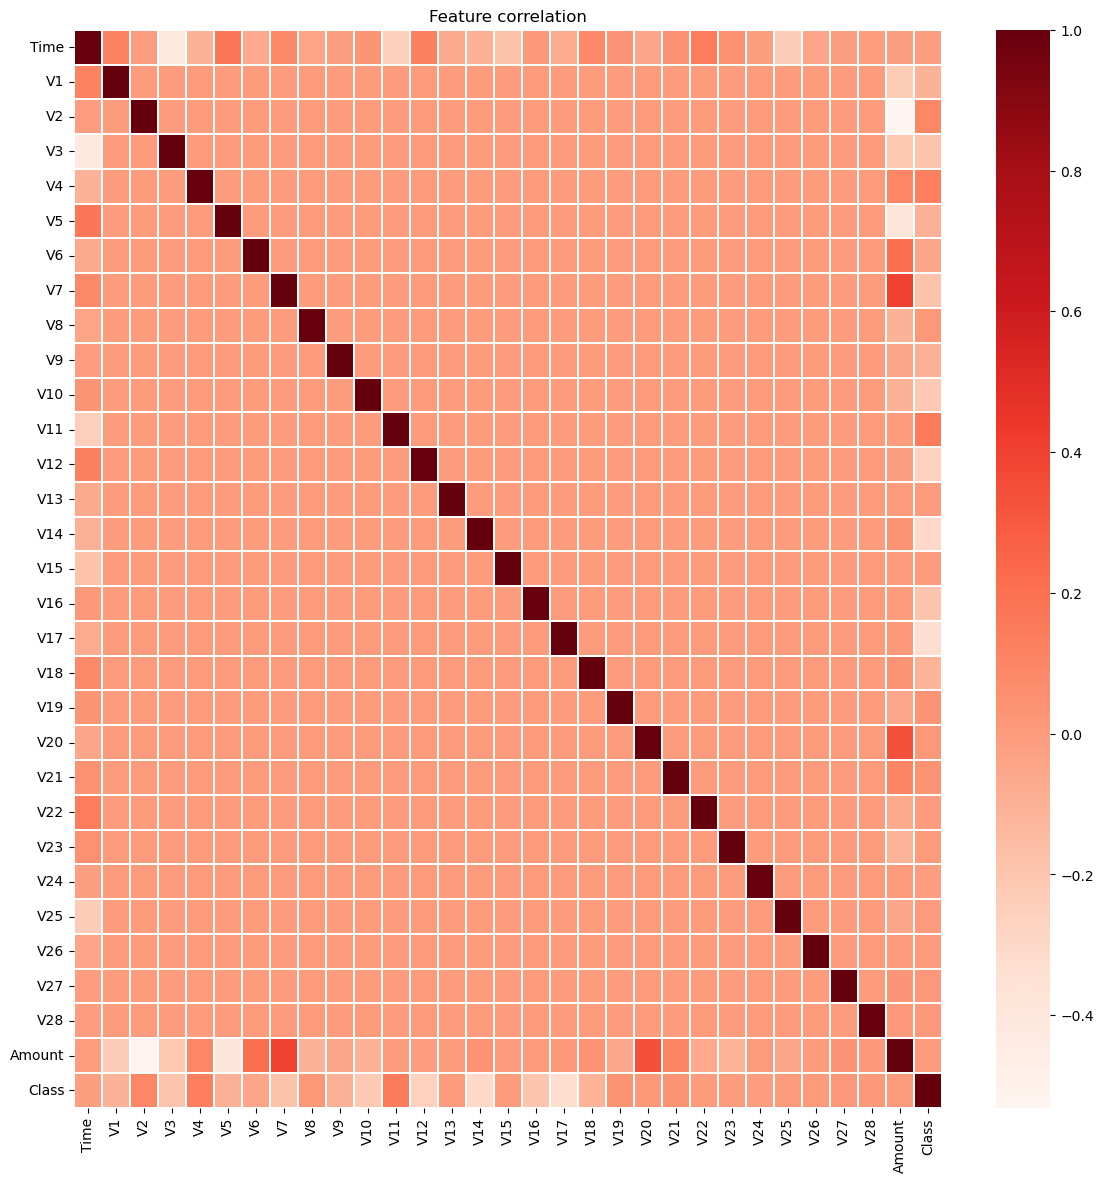

In [37]:
plt.figure(figsize=(14,14))
plt.title('Feature correlation')
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="Reds")
plt.show()

Correlation is Positive when the values increase together, and Correlation is Negative when one value decreases as the other increases 
Correlation can have a value: 
1 is a perfect positive correlation (between'Amount' and V7,'Amount' And'V20' )
0 is no correlation (between feature V1-V2 8)
-1 is a perfect negative correlation (between 'Time' and V3,'Amount' and V2, 'Amount' and V5)

# OUTLIERS

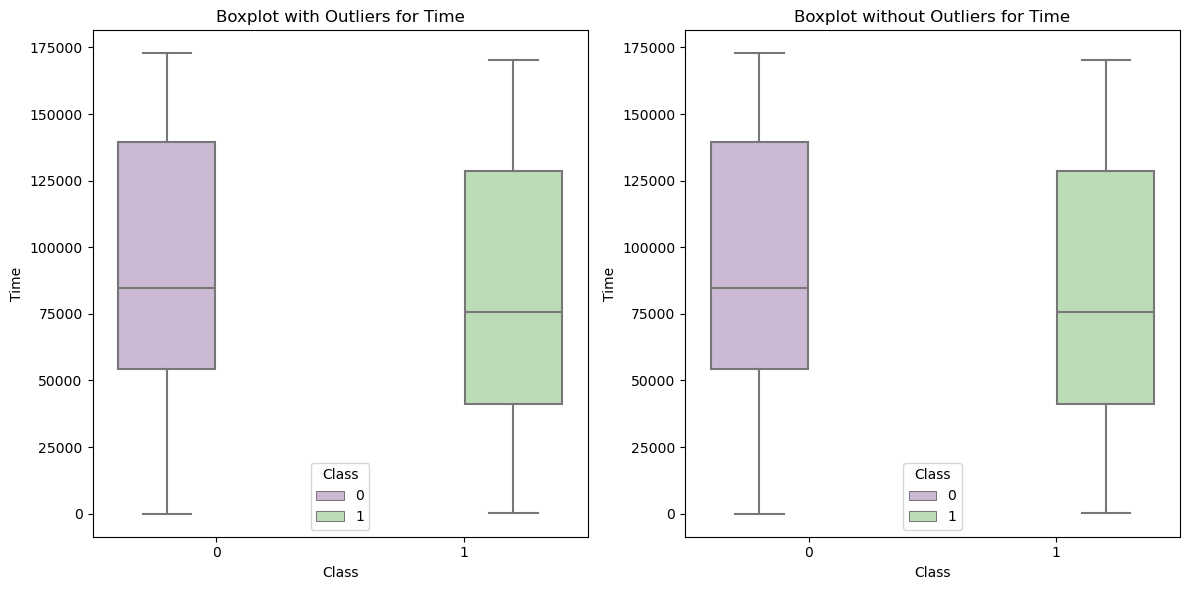

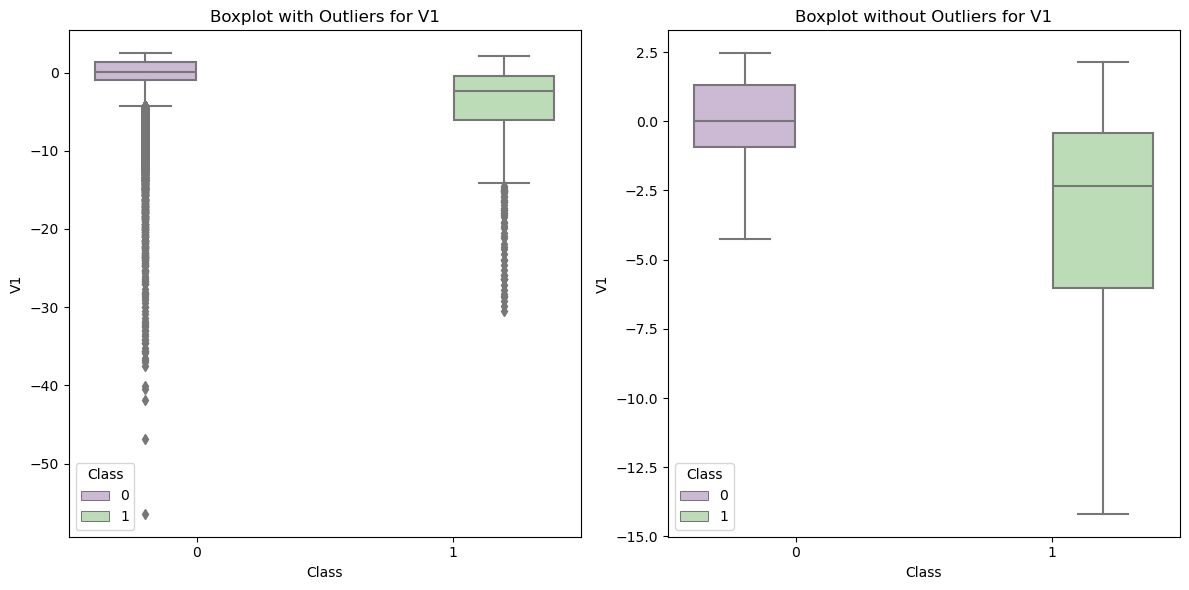

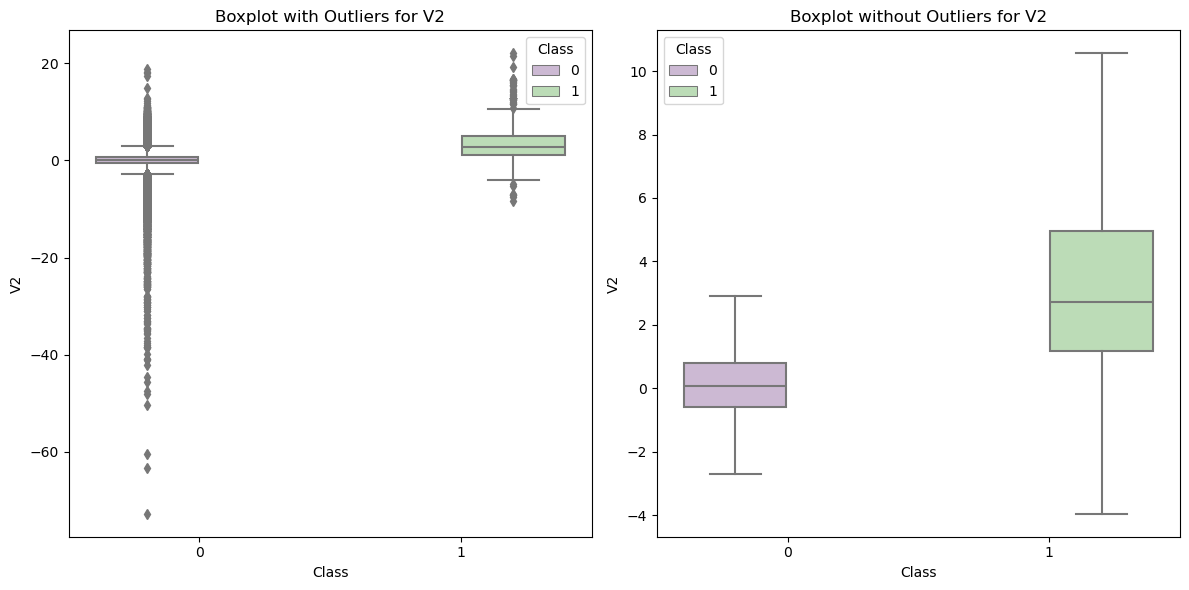

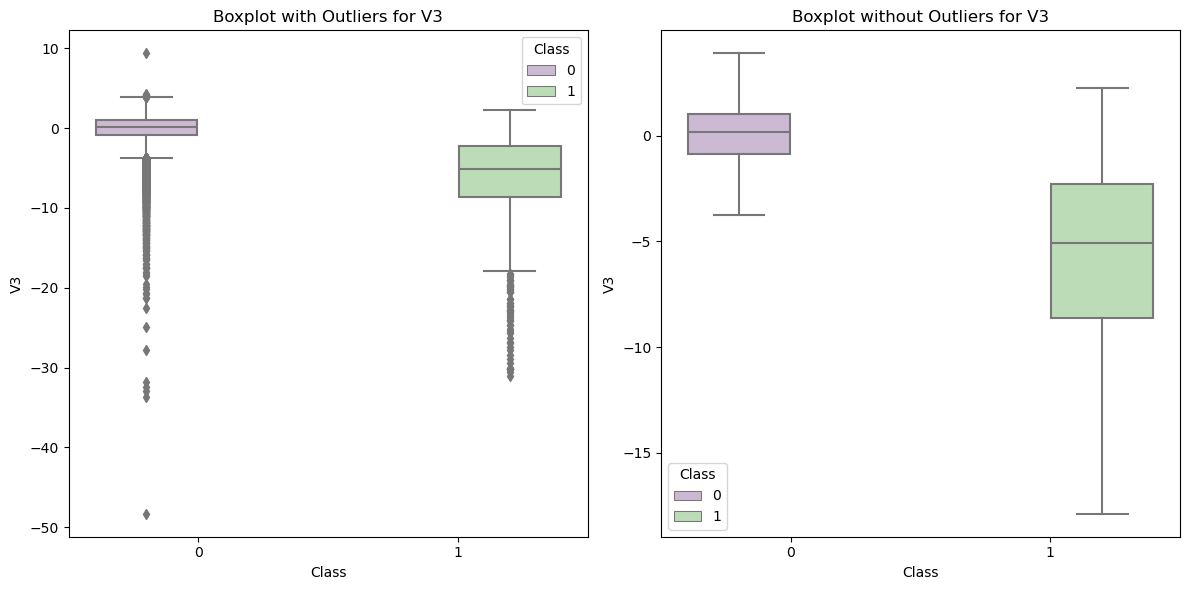

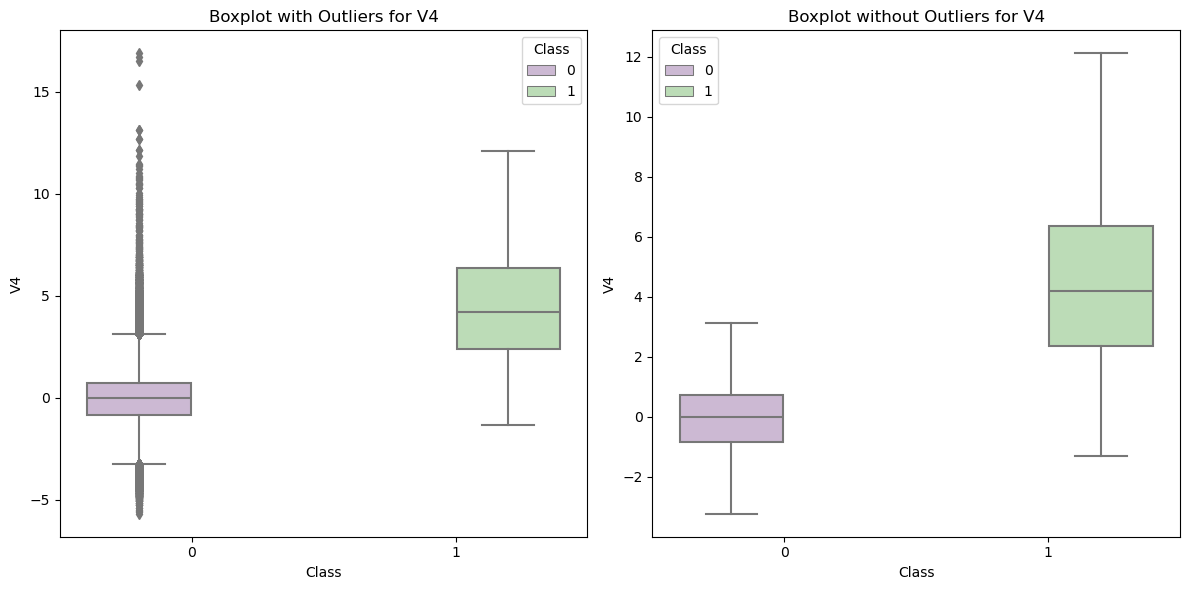

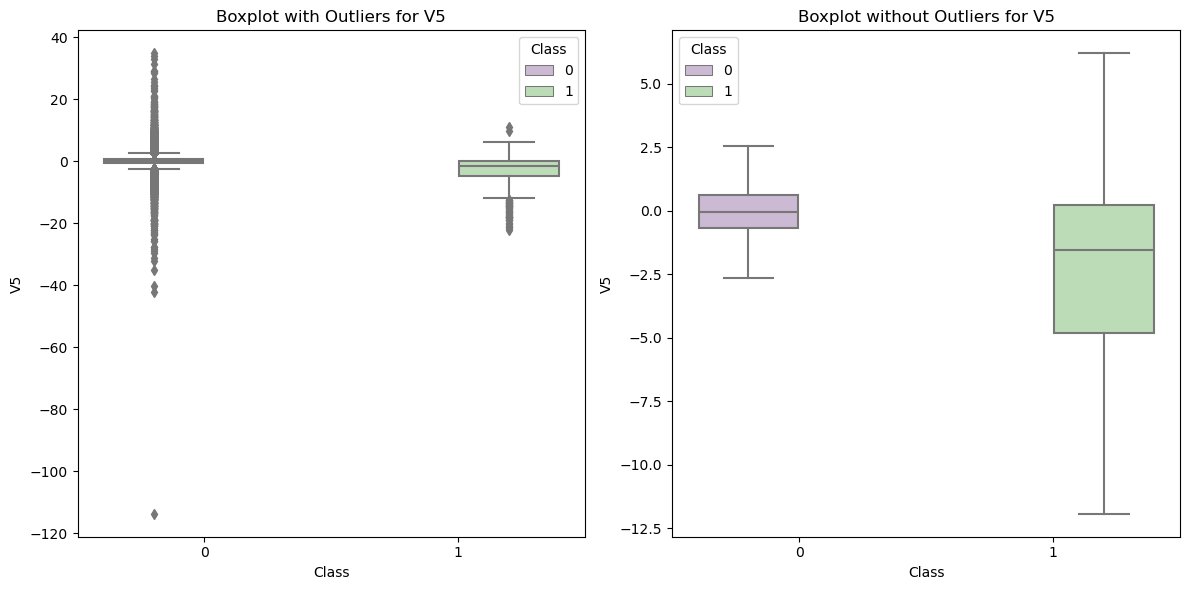

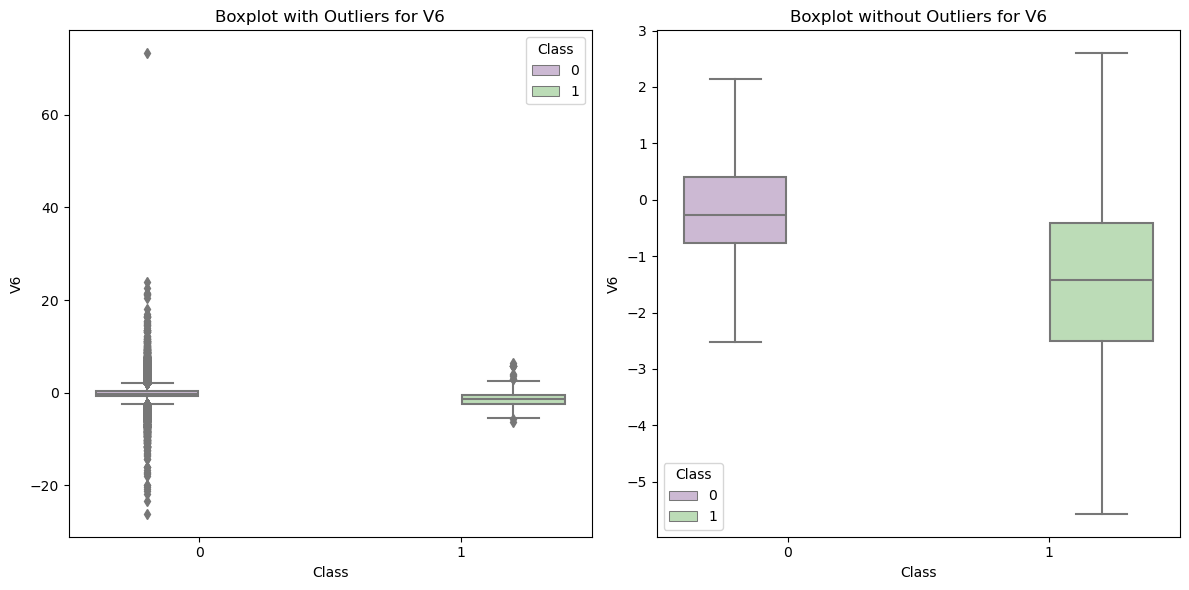

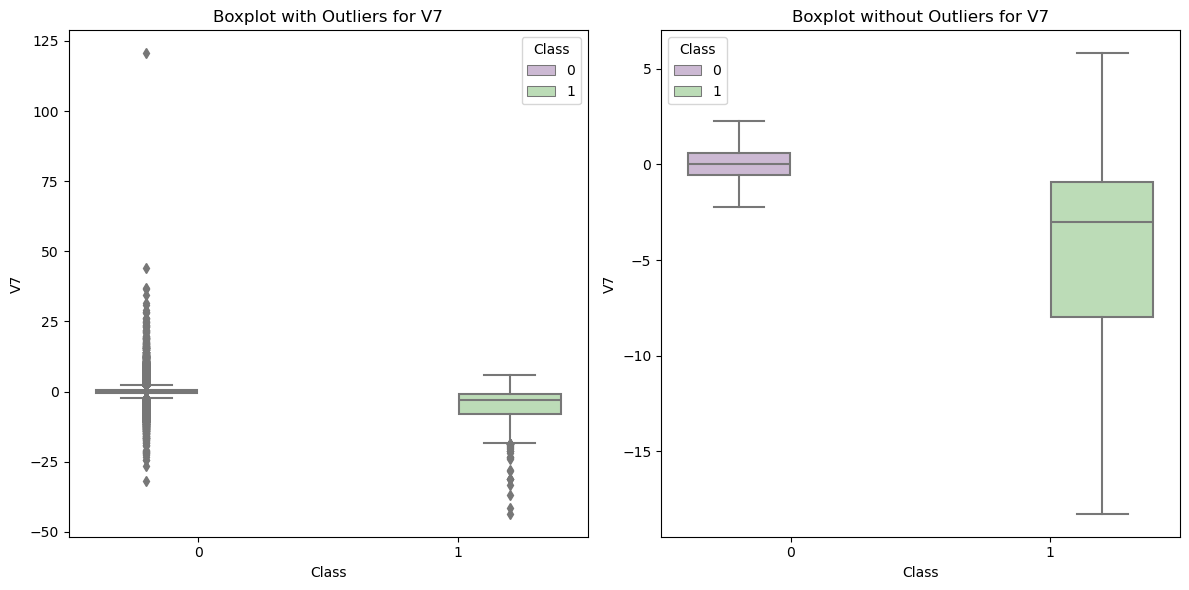

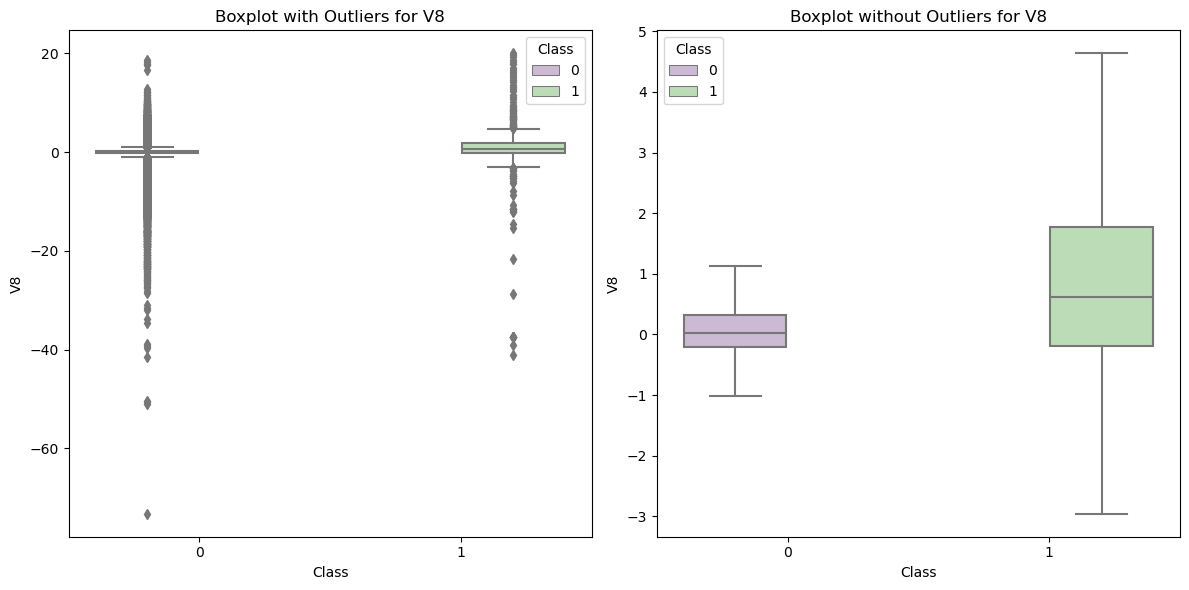

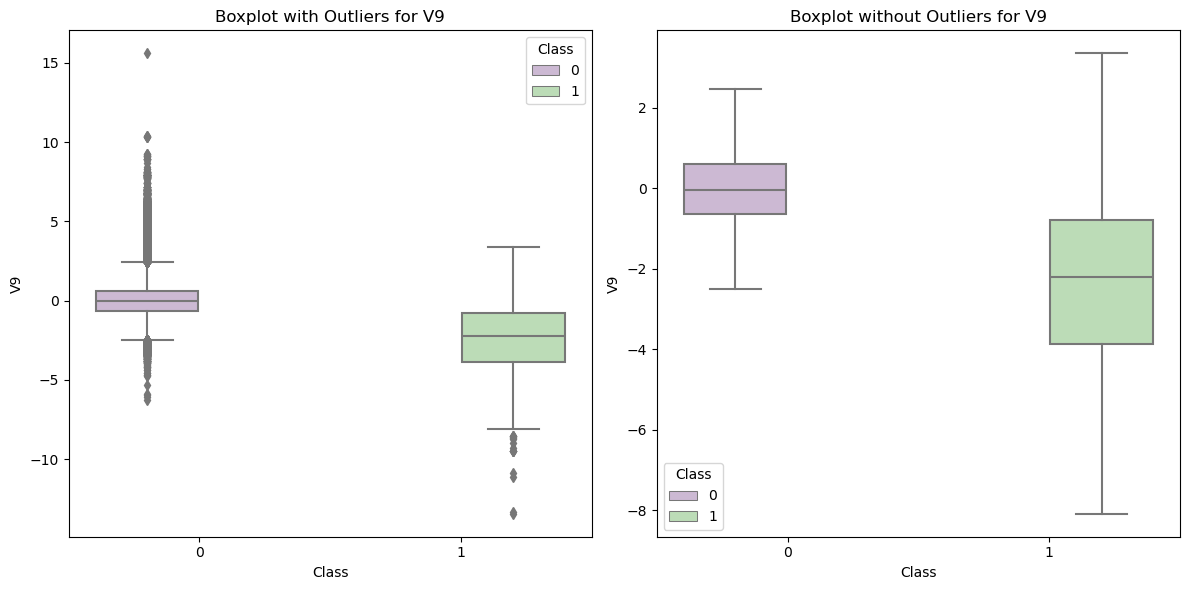

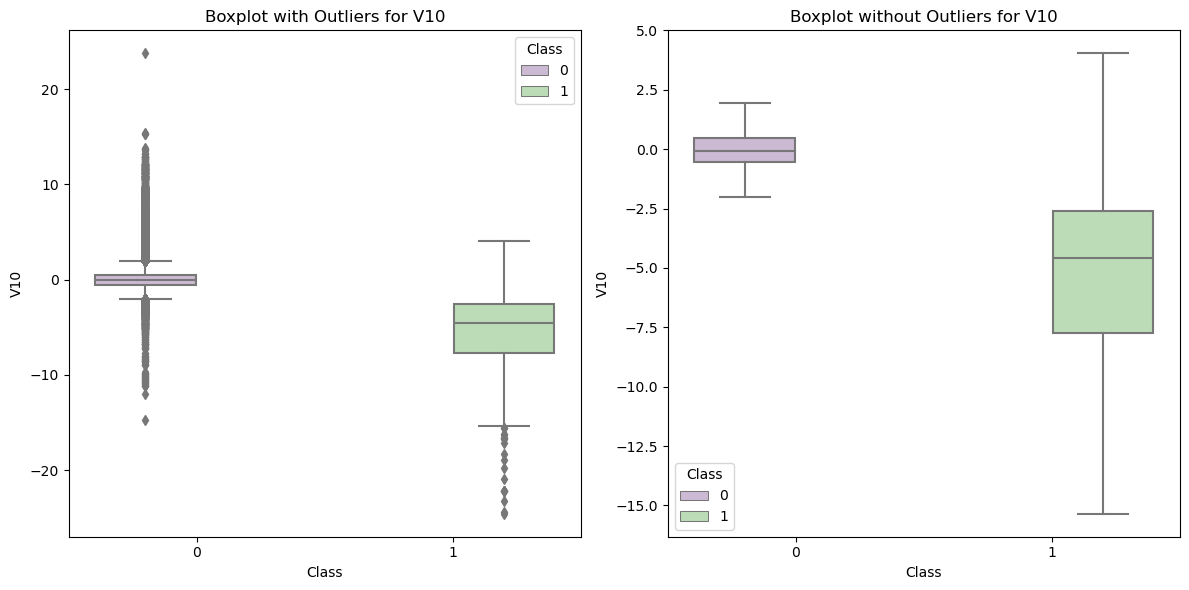

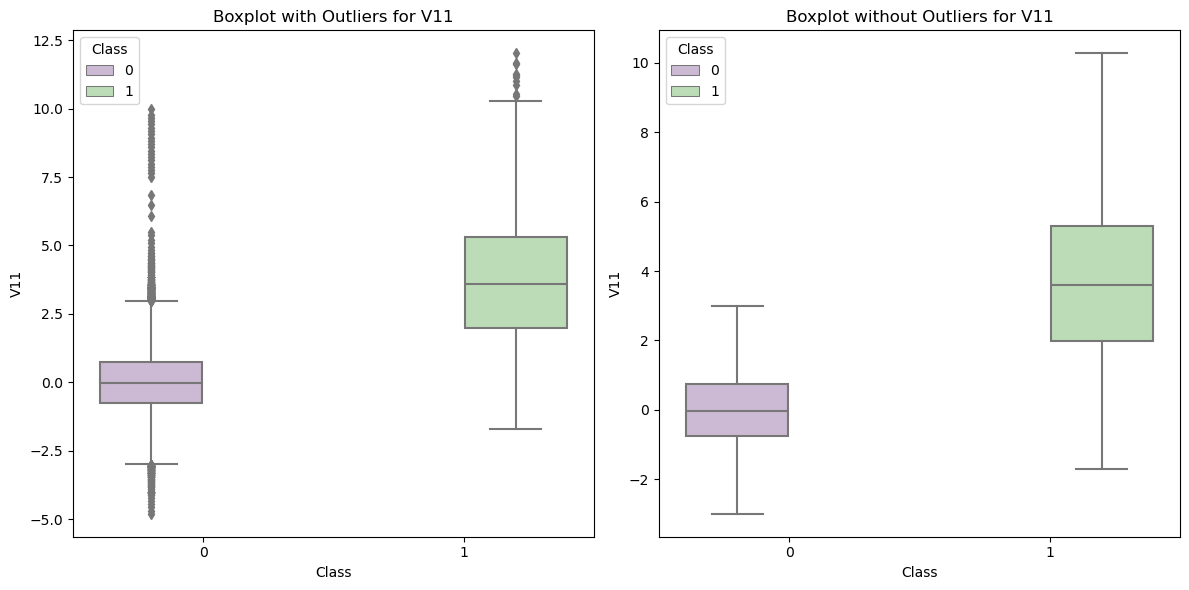

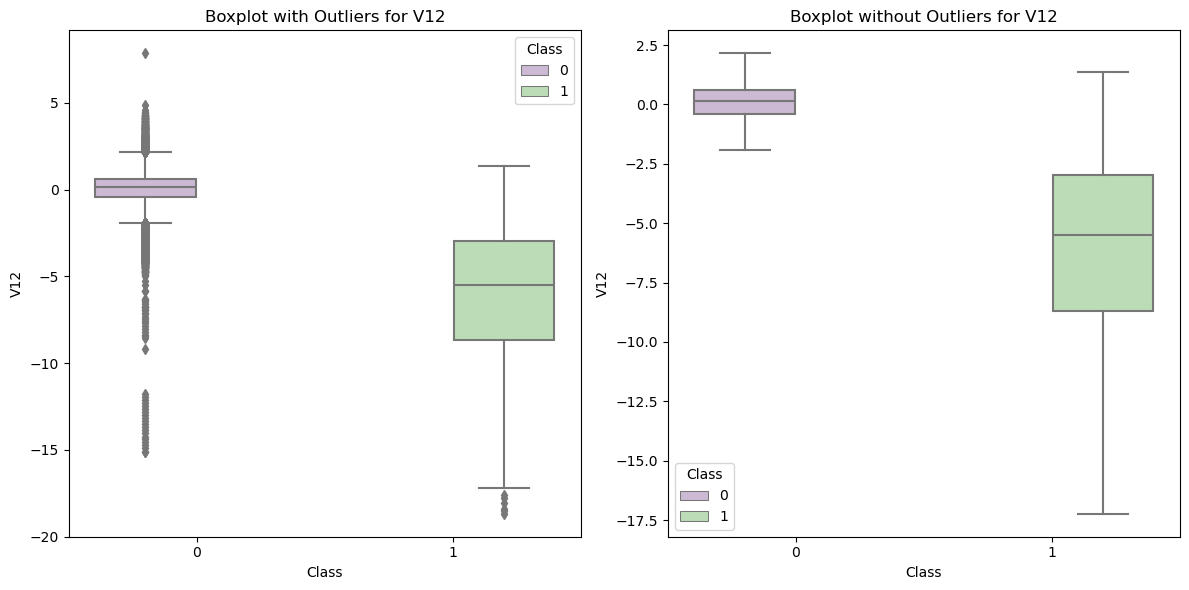

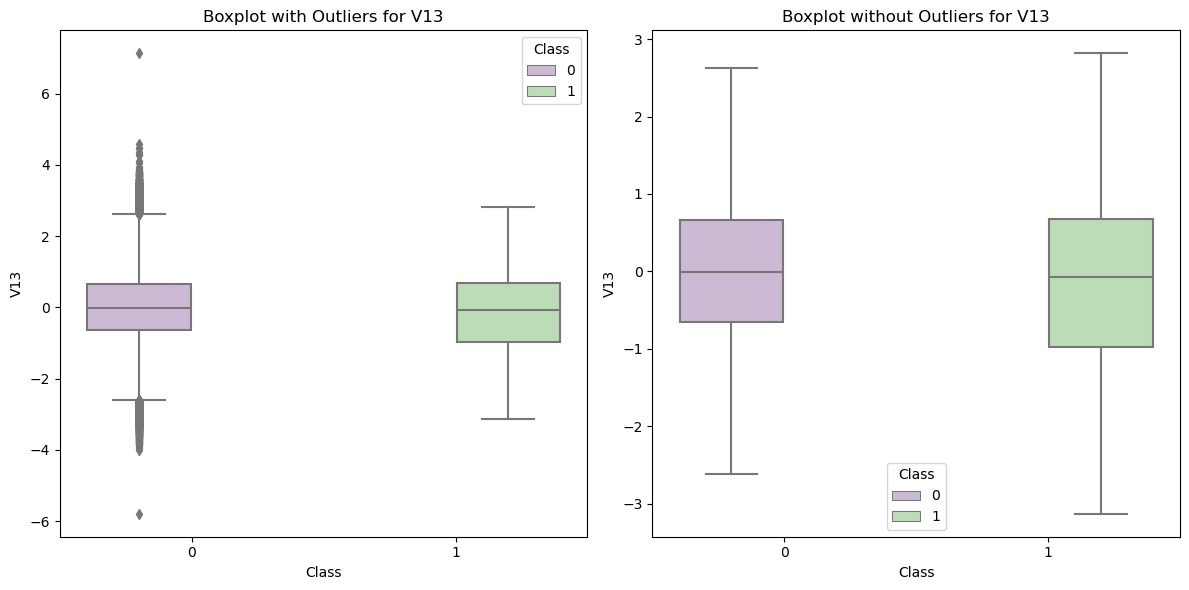

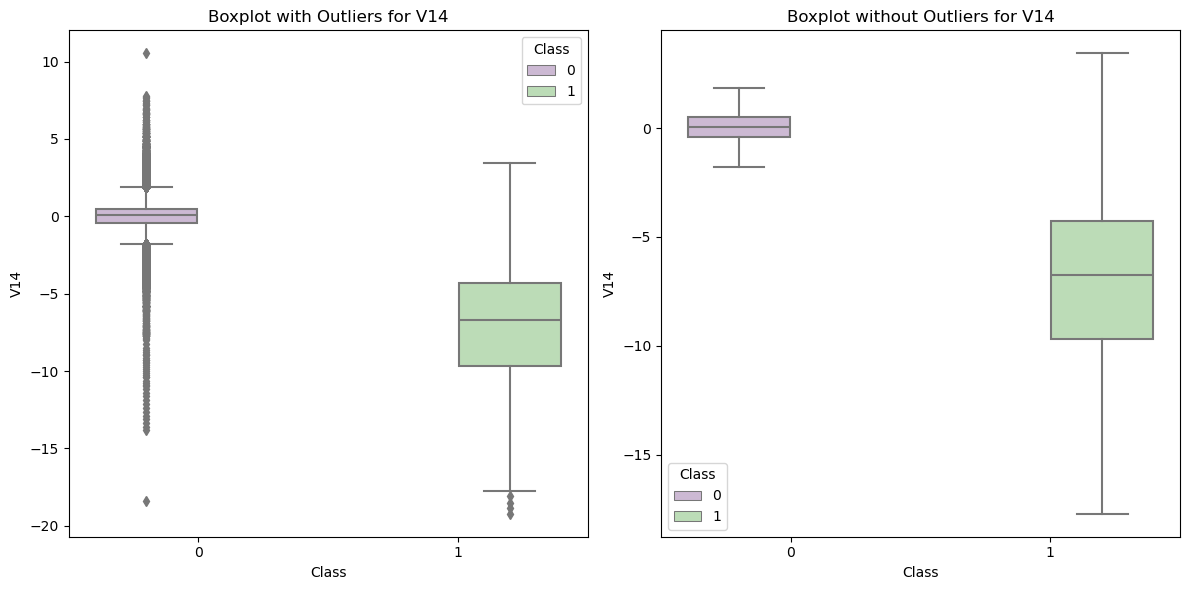

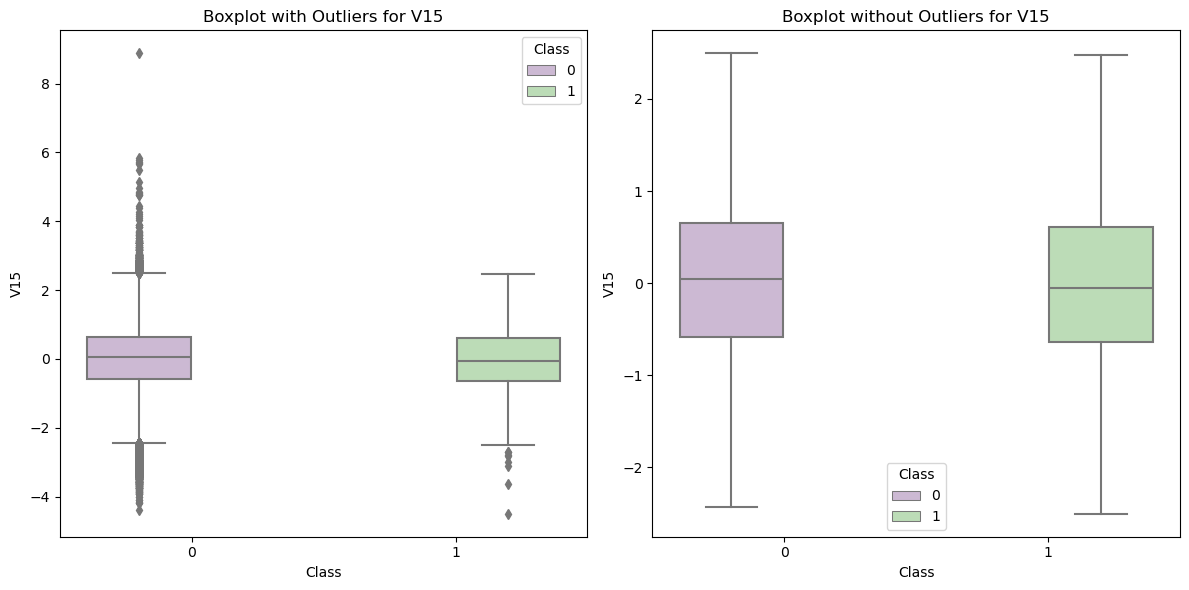

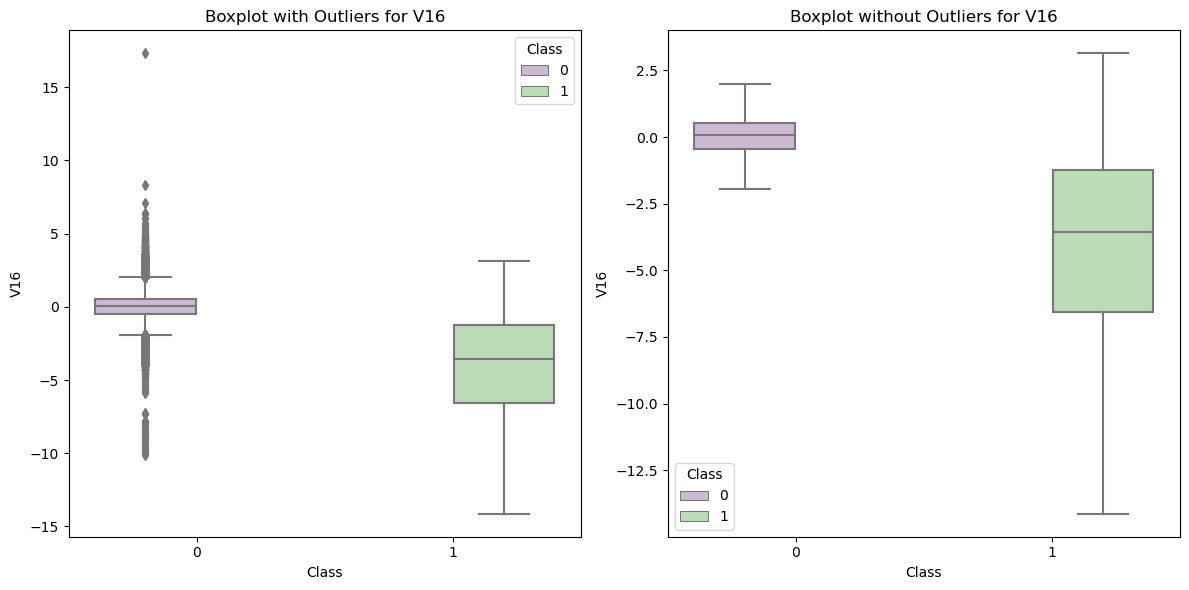

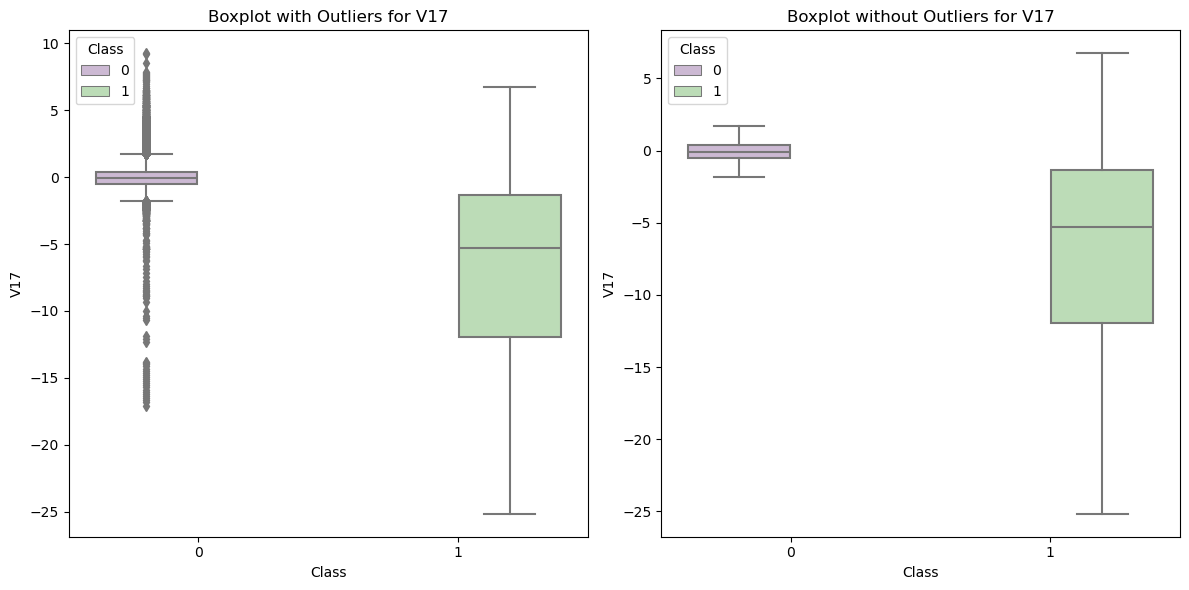

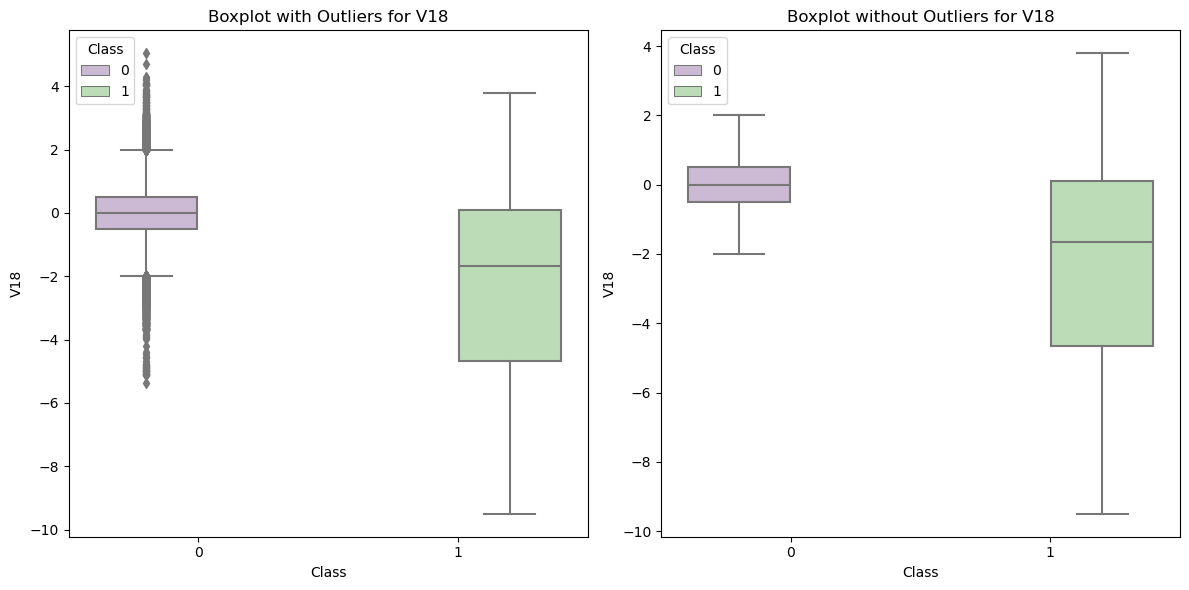

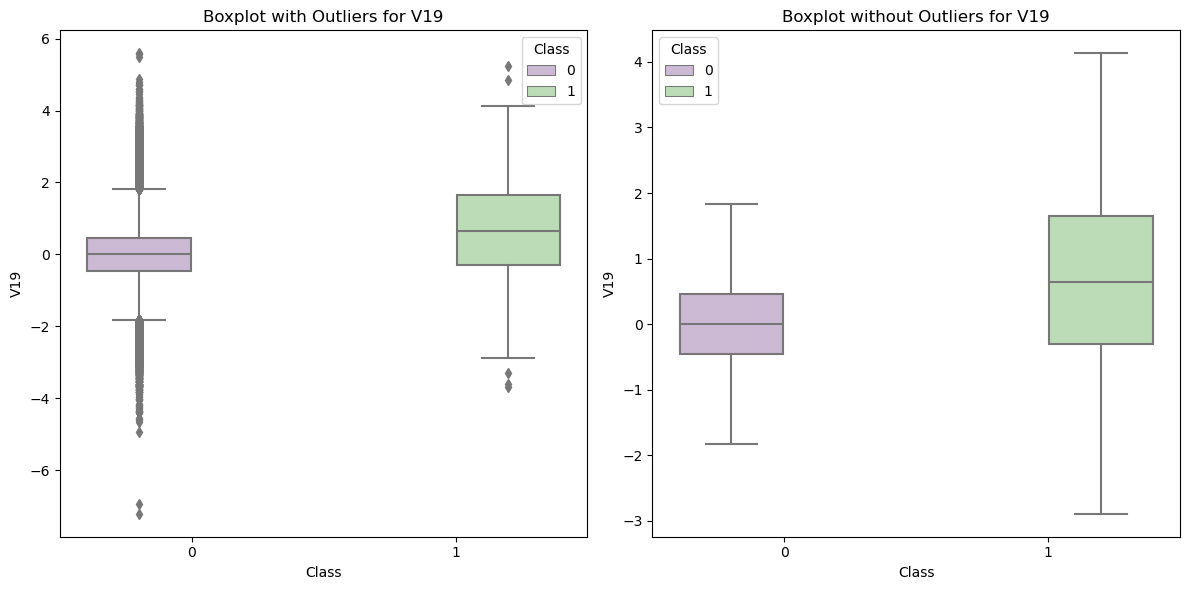

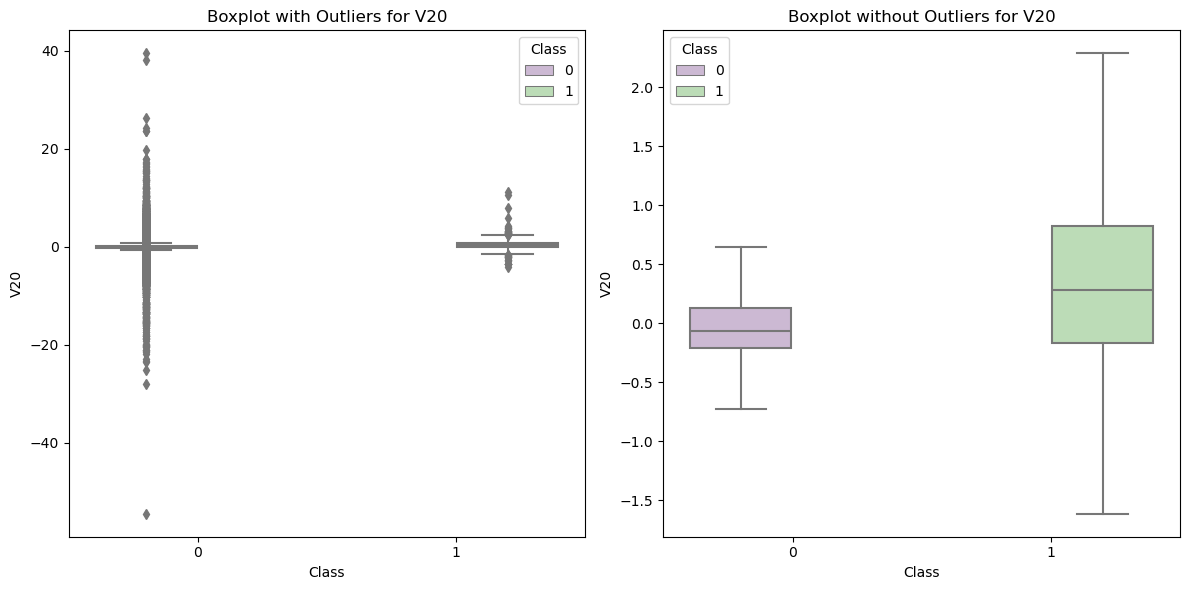

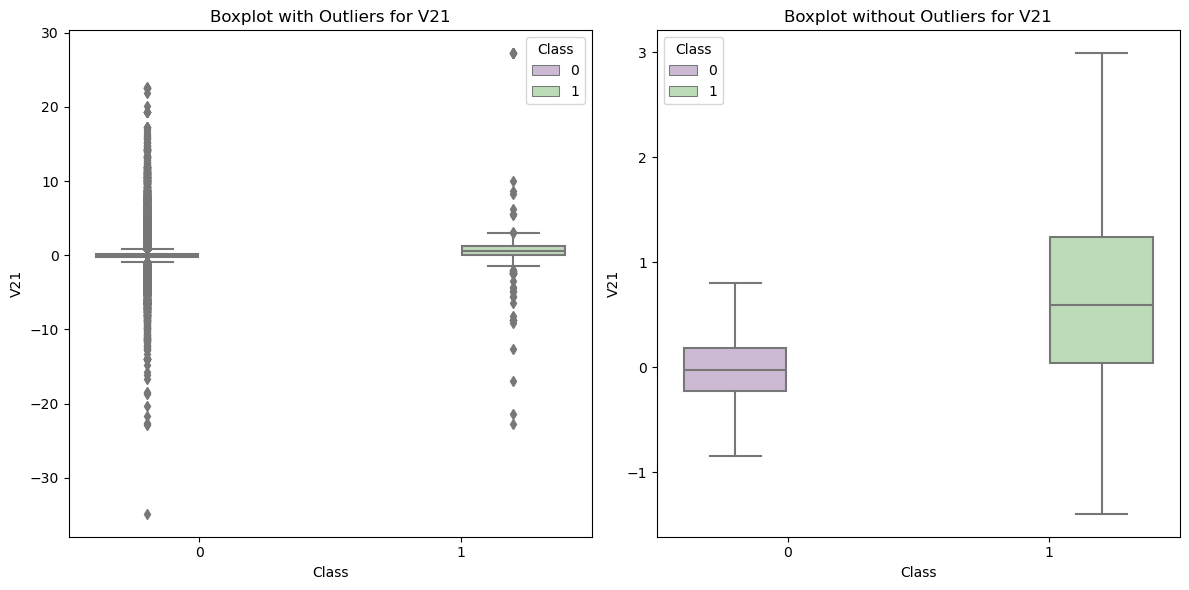

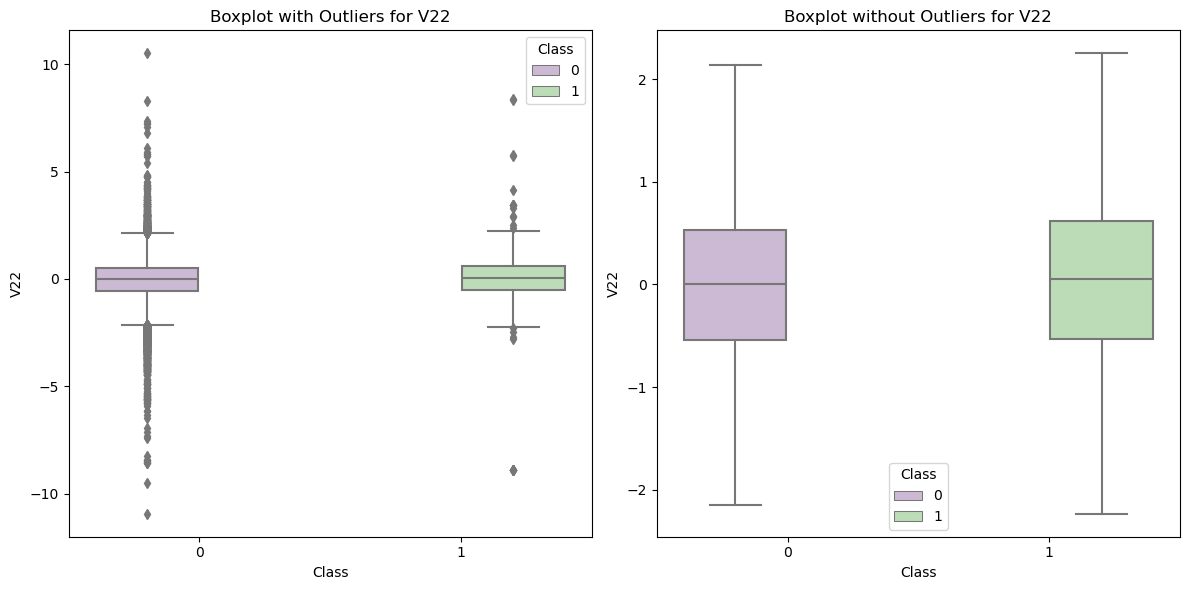

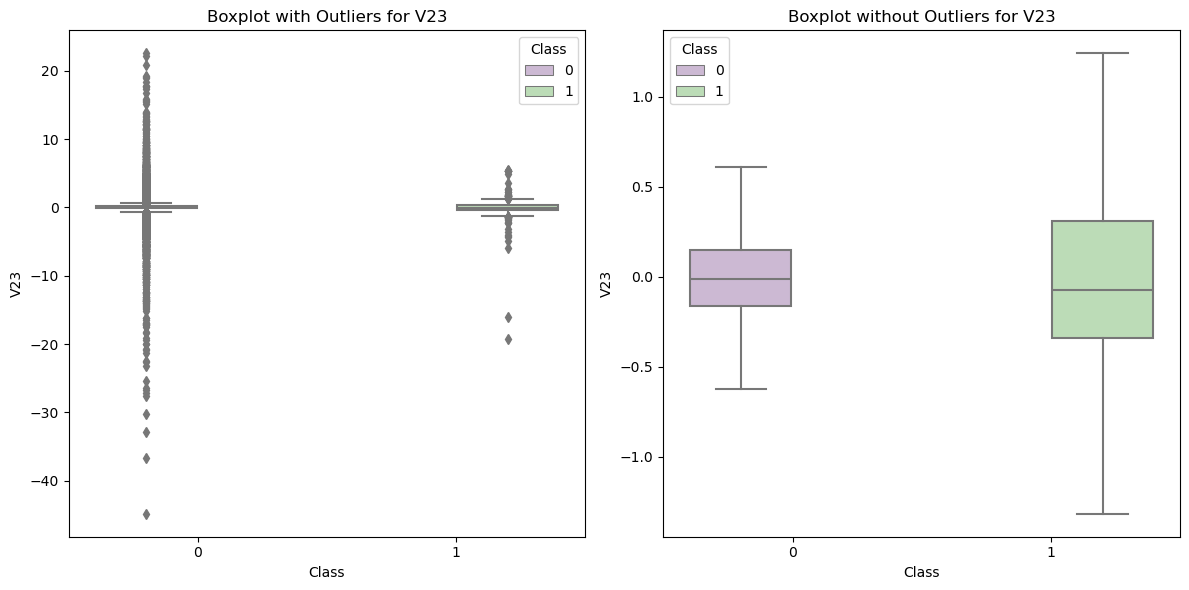

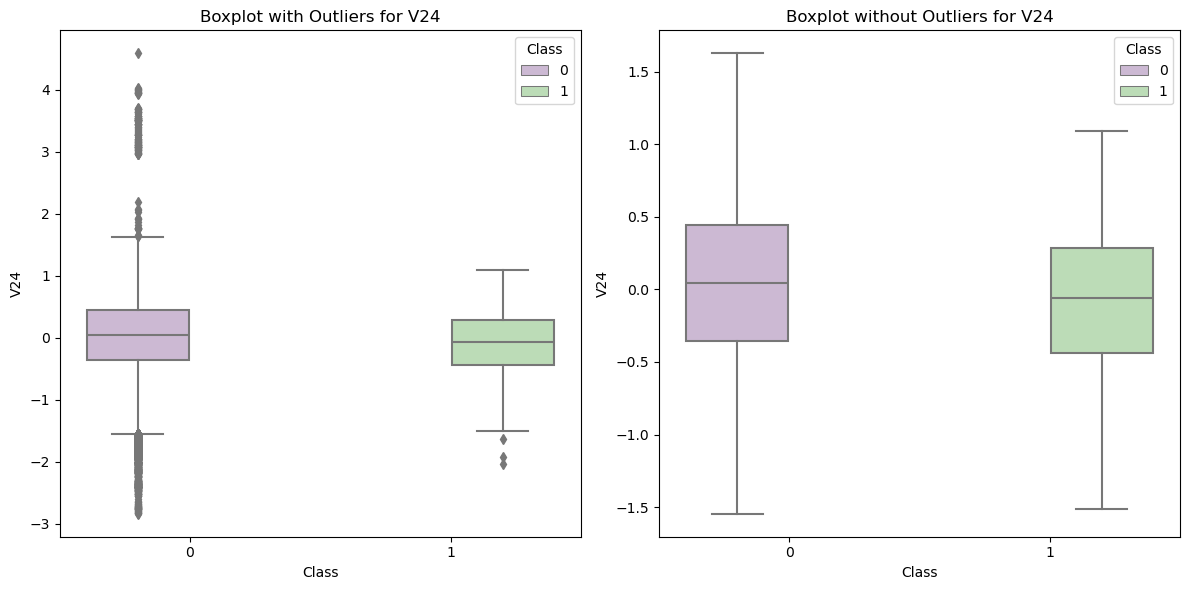

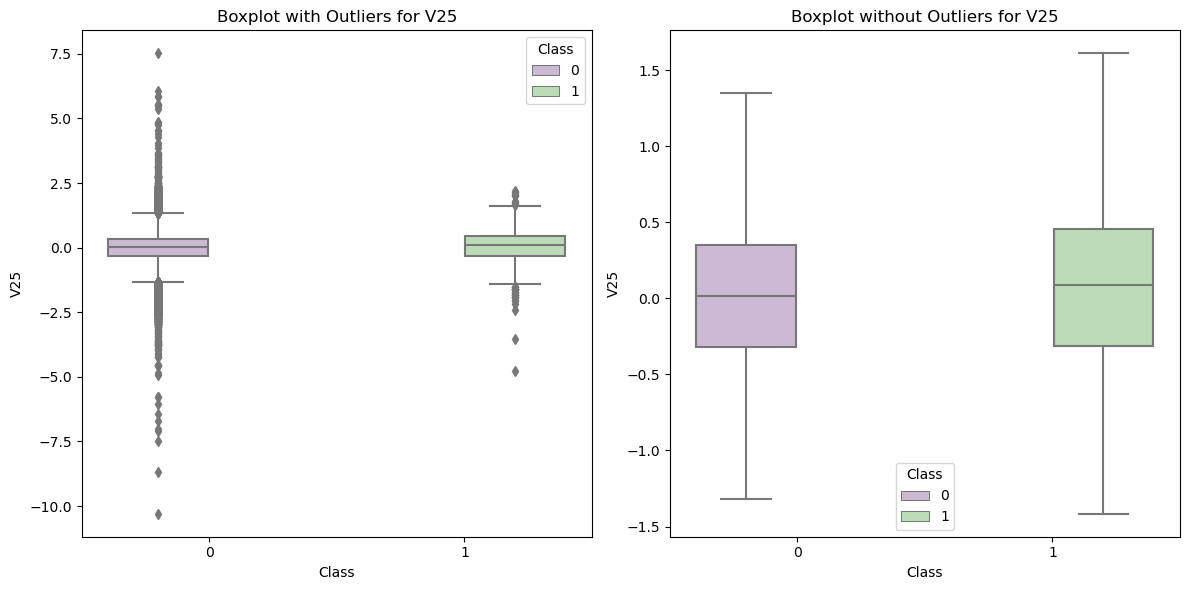

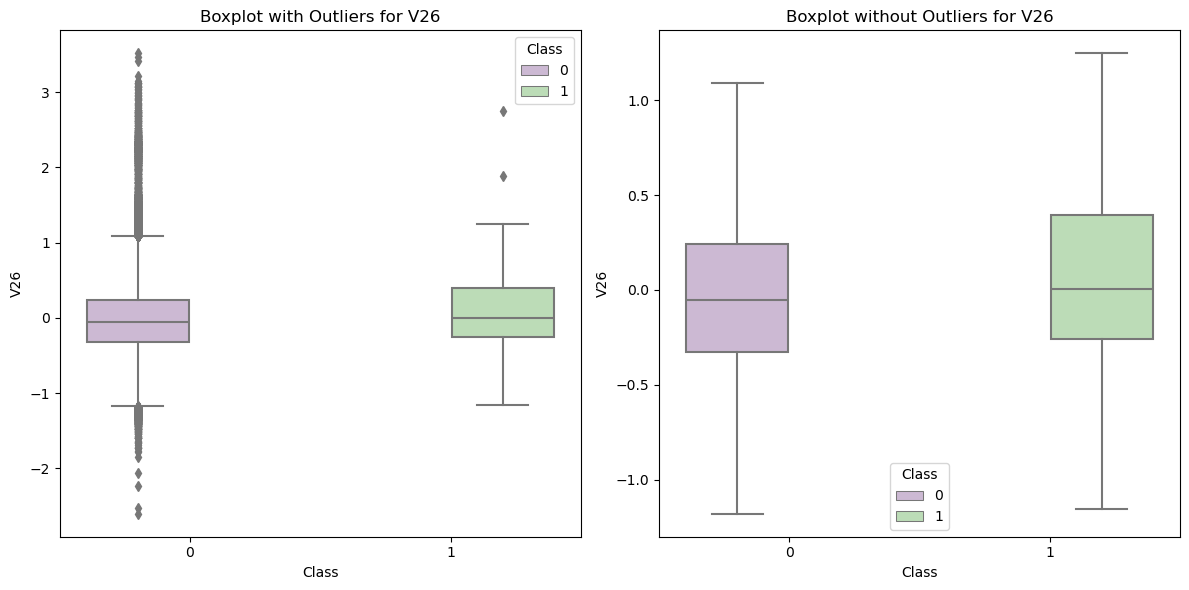

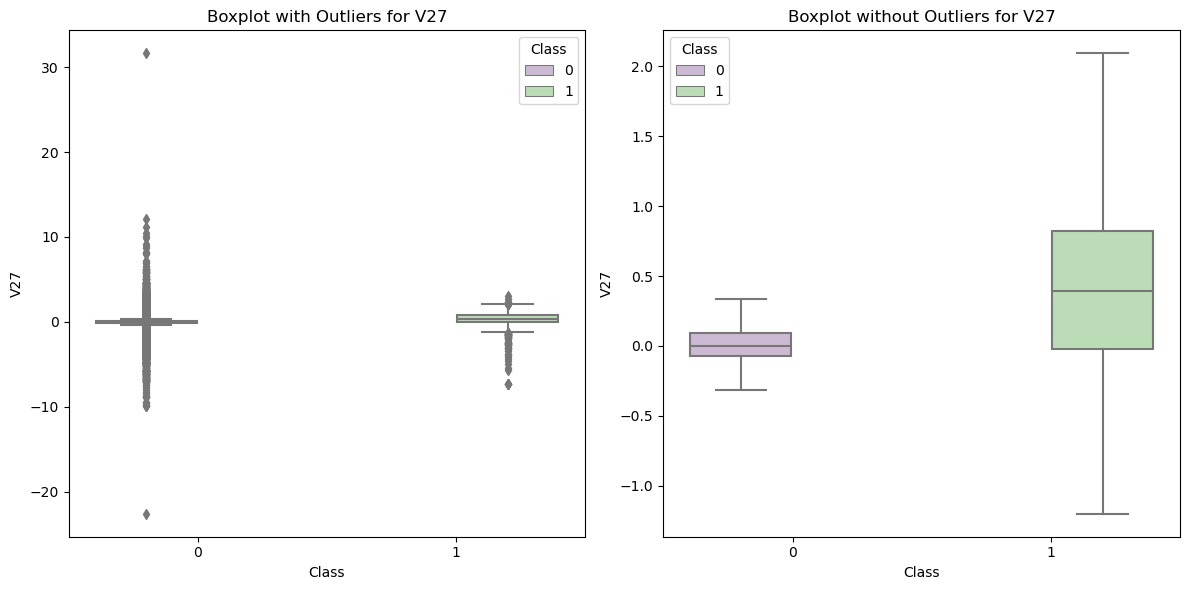

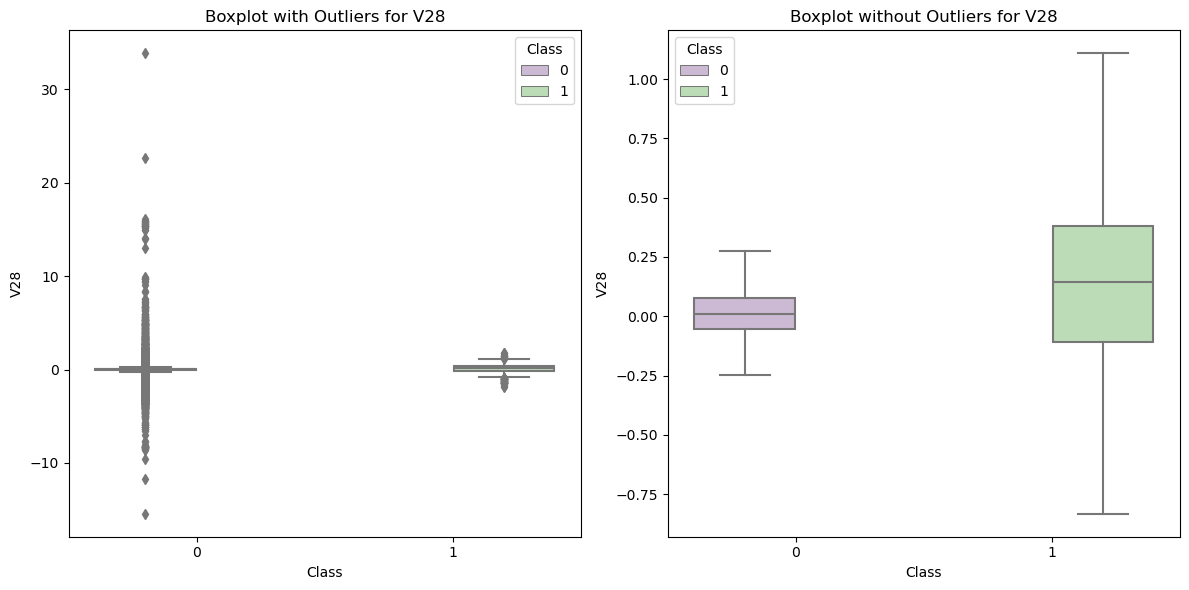

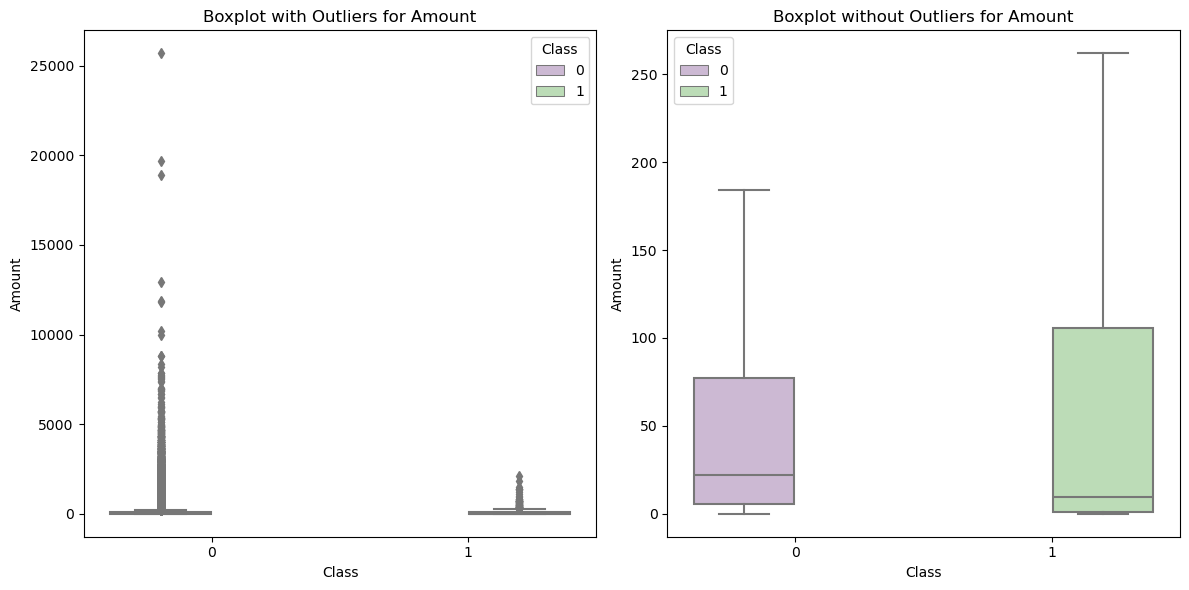

In [38]:

import seaborn as sns
import matplotlib.pyplot as plt

# Copying data and dropping the 'Class' column
data = train.copy()
data.drop(columns=['Class'], inplace=True)  # Corrected typo from 'colmuns' to 'columns'

# Looping through columns in 'data' (which no longer contains 'Class')
for i in data.columns:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    
    # Boxplot with fliers shown (ax1)
    sns.boxplot(ax=ax1, x="Class", y=i, hue="Class", data=train, palette="PRGn", showfliers=True)
    ax1.set_title(f'Boxplot with Outliers for {i}')
    
    # Boxplot without fliers shown (ax2)
    sns.boxplot(ax=ax2, x="Class", y=i, hue="Class", data=train, palette="PRGn", showfliers=False)
    ax2.set_title(f'Boxplot without Outliers for {i}')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

    



Above Box plot say fradulant transaction has more outlier than non fradulant transaction. Since our data is highly imbalance and we have less amount frudulant transaction so traforming outliers leads to loss of information. we will use outlier as it is.

<Figure size 640x480 with 0 Axes>

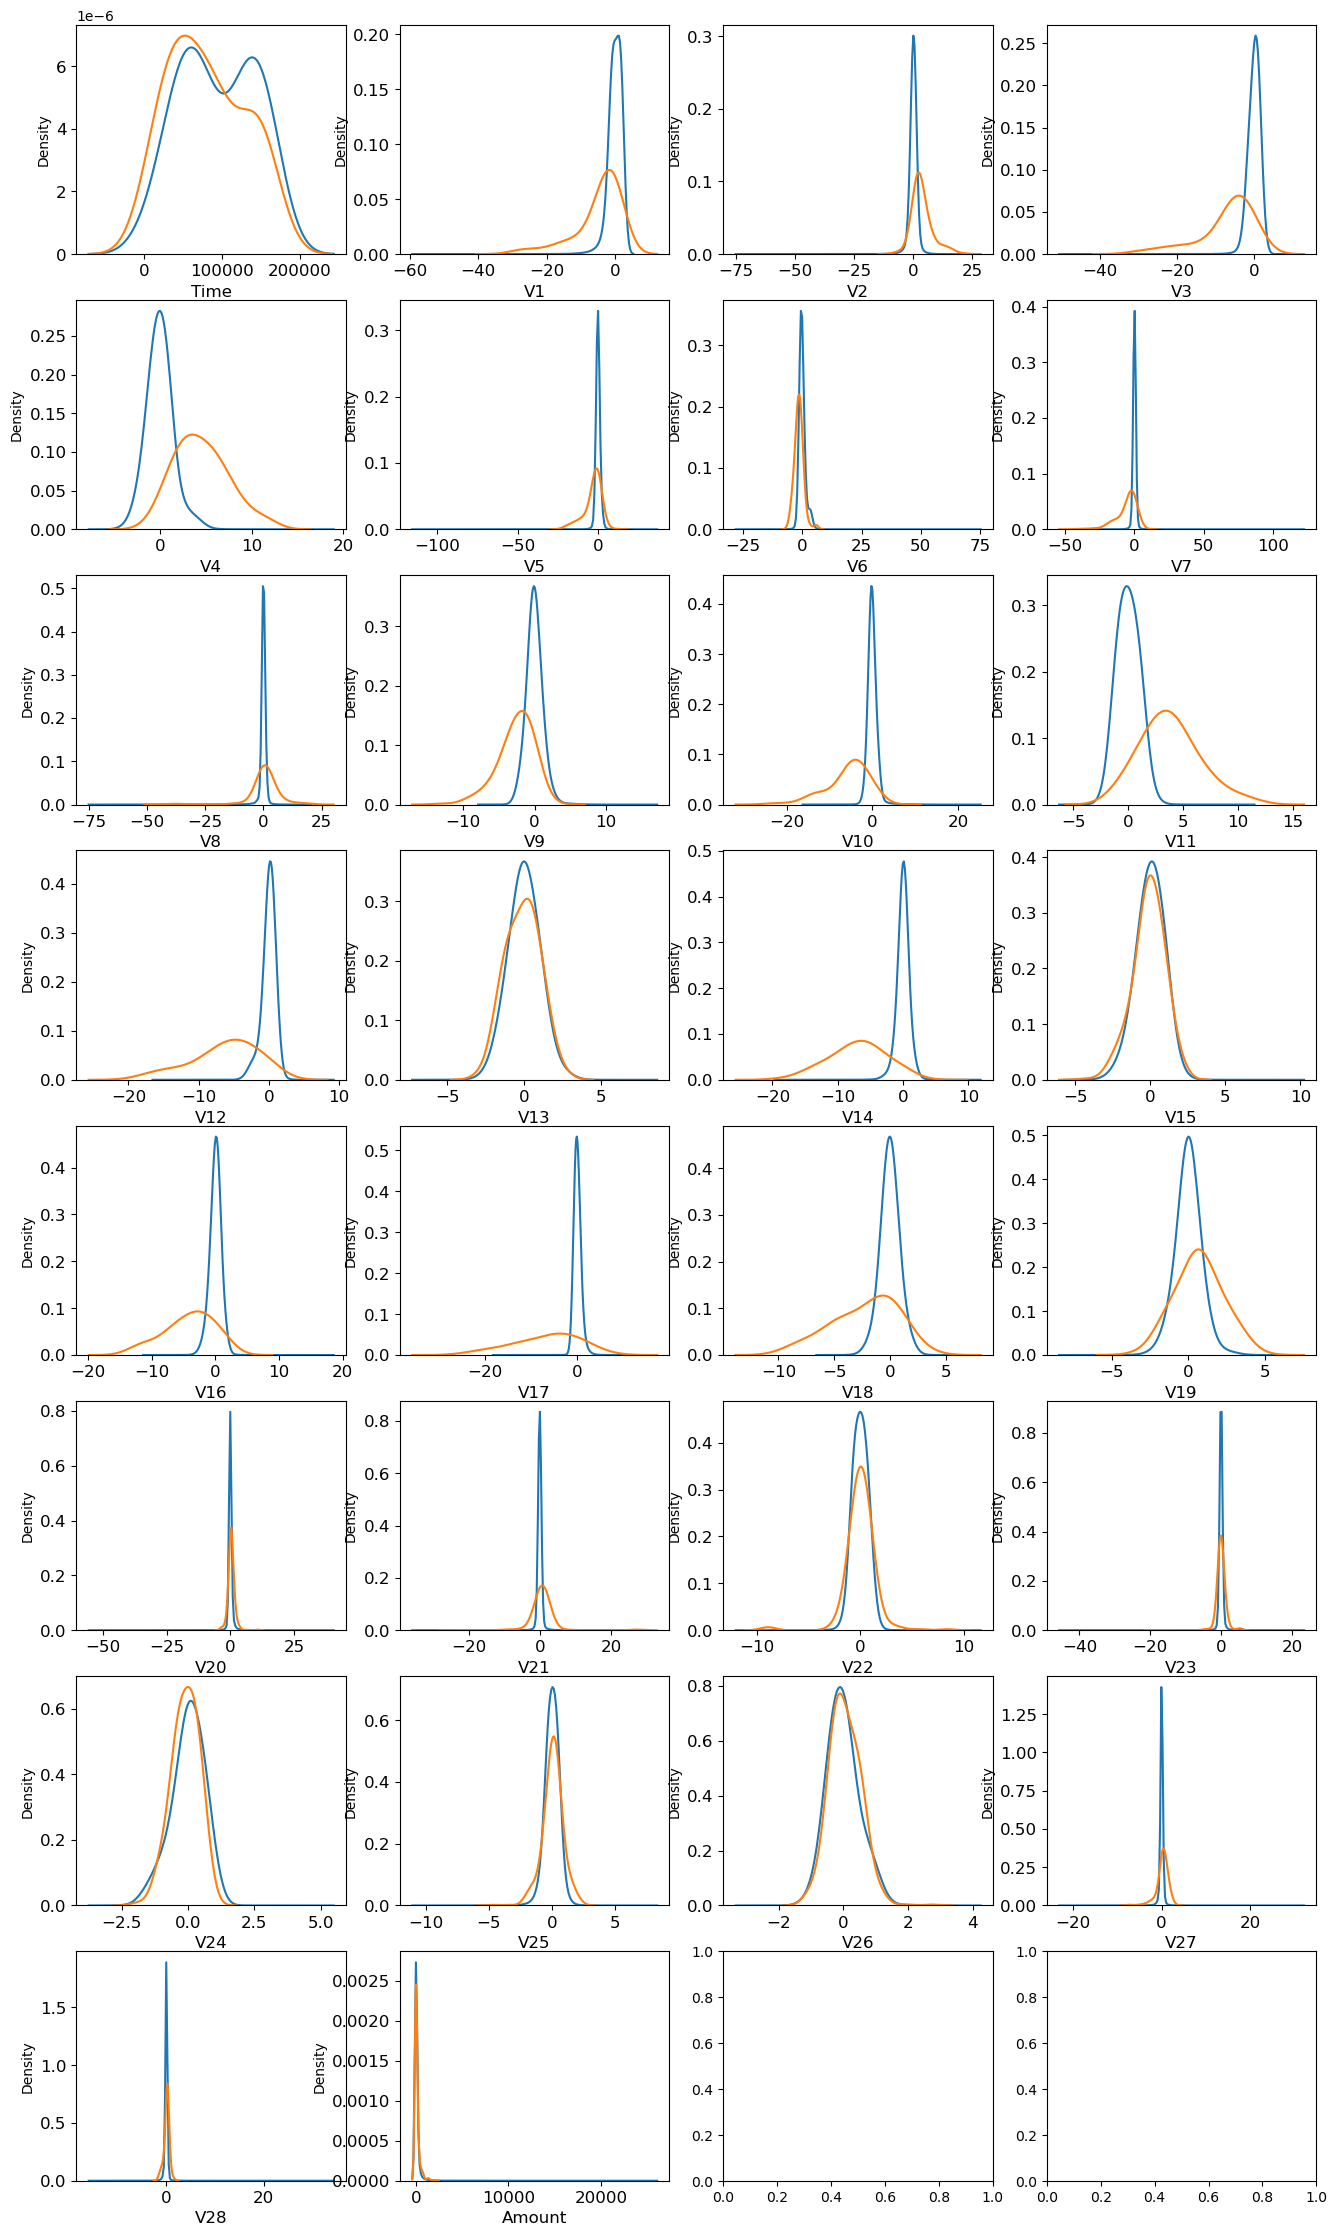

In [39]:
# Plotting all the variable in displot to visualise the distribution
var = list(train.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();
    

Text(0.5, 1.0, 'V1-V28 Skewnesses for Class0')

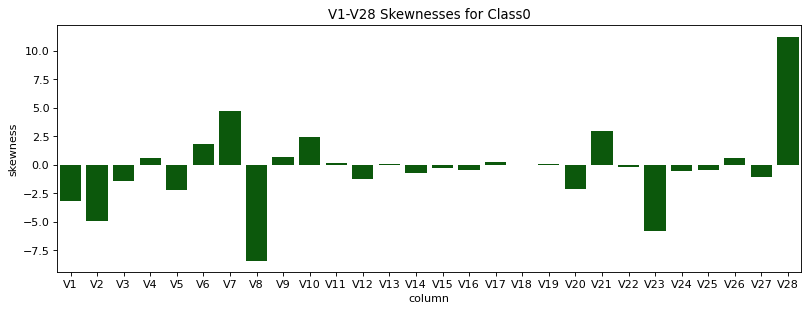

In [40]:
pca_vars = ['V%i' % k for k in range(1,29)]
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=t0[pca_vars].skew(), color='darkgreen')
plt.xlabel('column')
plt.ylabel('skewness')
plt.title('V1-V28 Skewnesses for Class0')

From above plot we can see fradulant transaction has more skewness than normal transaction

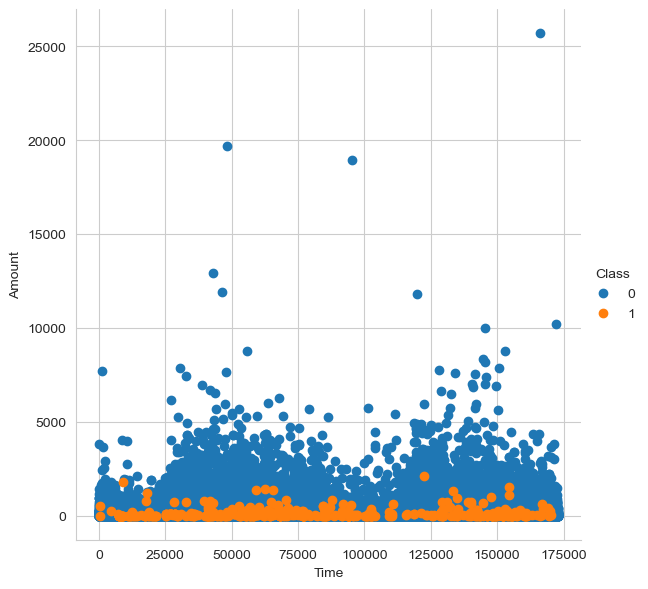

In [41]:
sns.set_style("whitegrid")
sns.FacetGrid(train, hue="Class", height = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

#observations:

from the above two plots it is clearly visible that there are frauds only on the transaction which have transaction amount approximately less than 2500.
transaction which have transaction amount approximately above 2500 have no fraud.
As per with time, the frauds in the transaction are evenly distributed throughout time.

In [42]:
FilteredData = train[['Time','Amount', 'Class']]
countLess = FilteredData[FilteredData['Amount'] < 2500]
countMore = train.shape[0] - len(countLess)
percentage = round((len(countLess)/train.shape[0])*100,2)
Class_1 = countLess[countLess['Class'] == 1]
print('Total number for transaction less than 2500 is {}'.format(len(countLess)))
print('Total number for transaction more than 2500 is {}'.format(countMore))
print('{}% of transaction having transaction amount less than 2500' .format(percentage))
print('{} fraud transaction in data where transaction amount is less than 2500' .format(len(Class_1)))

Total number for transaction less than 2500 is 284358
Total number for transaction more than 2500 is 449
99.84% of transaction having transaction amount less than 2500
492 fraud transaction in data where transaction amount is less than 2500


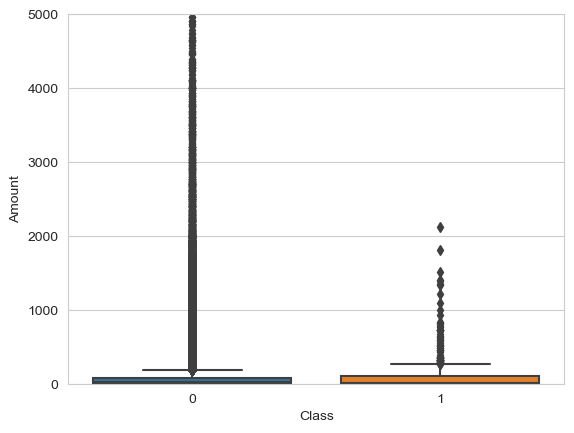

In [43]:
sns.boxplot(x = "Class", y = "Amount", data = train)
plt.ylim(0, 5000)
plt.show()

In [44]:
Amount_0 = train.loc[train['Amount'] == 0]
print(Amount_0['Class'].value_counts())

Class
0    1798
1      27
Name: count, dtype: int64


# Data Transformation

In [45]:
from sklearn.preprocessing import StandardScaler

# Clean column names and scale 'Amount' and 'Time'
train.columns = train.columns.str.strip()  # Remove extra spaces

scaler = StandardScaler()
train['scaled_amount'] = scaler.fit_transform(train['Amount'].values.reshape(-1, 1))
train['scaled_time'] = scaler.fit_transform(train['Time'].values.reshape(-1, 1))

# Drop original columns after scaling
train.drop(['Amount', 'Time'], axis=1, inplace=True)

# Display first few rows
print(train.head())



         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_amount  scaled_time  

Assuming you've already loaded your 'train' DataFrame,
Filter fraudulent transactions where 'Class' is 1 (fraudulent),
Now print the 'Amount' details of fraudulent transactions.


In [46]:
import pandas as pd

train = pd.read_csv('creditcard.csv')

fraud = train[train['Class'] == 1]


print("Amount details of the fraudulent transactions:")
print(fraud['Amount'].describe())


Amount details of the fraudulent transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


#print amount details of the legit transaction

In [47]:
print("\nAmount details of the legit transaction:")
print(train['Amount'].describe())


Amount details of the legit transaction:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


#Visualize the distribution of 'Amount'

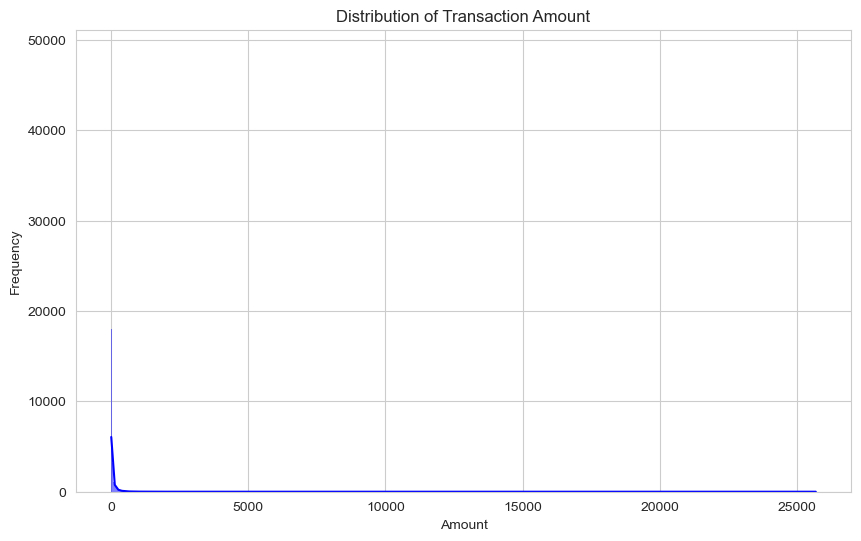

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(train['Amount'], kde=True, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

visualize the distribution of 'Time' (time of transaction)


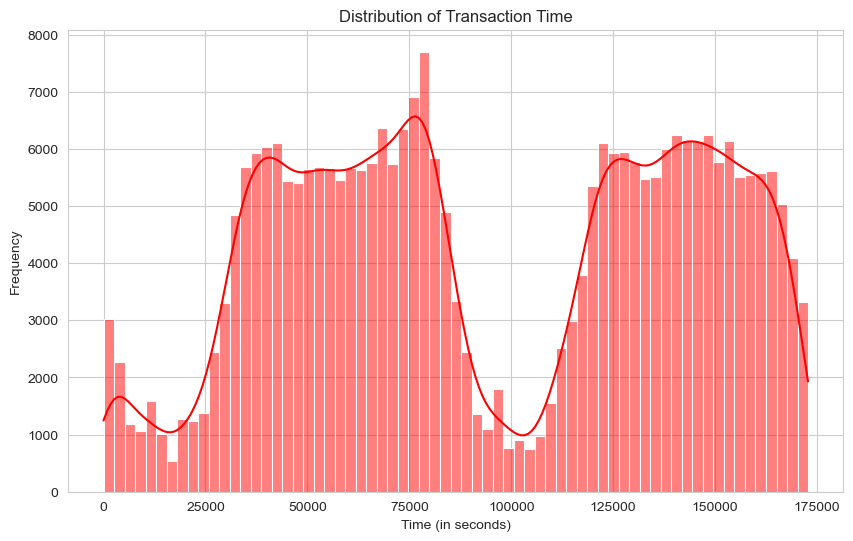

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Time'], kde=True, color='red')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

# Summary
Strategic Selection of XGBoost Model for Credit Card Fraud Detection
In the pursuit of an effective solution to address credit card fraud detection, our primary objective is to achieve a high recall rate. A high recall is crucial to identifying a significant proportion of actual fraudulent transactions, offering a robust defense mechanism against potential high-value fraudulent activities.

Given the severe consequences that banking institutions face in terms of monetary losses, credibility, and trust due to fraudulent transactions, prioritizing recall becomes a strategic choice to safeguard both the financial well-being of banks and the interests of their customers.